### SF Air Quality Index - Time Base Analysis V.1

In [1]:
# import Dependencies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [2]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('../AQI_model/aqi_all_ copy.csv')

In [3]:
df.head(10)

Date  aqi_co  aqi_no2  aqi_o3  aqi_pm_2_5  aqi_pm_10  AQI_Max
0  2015-01-01     7.0     37.0    26.0        55.0        NaN     55.0
1  2015-01-02     8.0     42.0    20.0        73.0        NaN     73.0
2  2015-01-03    10.0     45.0    17.0        84.0        NaN     84.0
3  2015-01-04    10.0     40.0    19.0        86.0        NaN     86.0
4  2015-01-05     9.0     42.0    12.0        69.0        NaN     69.0
5  2015-01-06    10.0     47.0    13.0        90.0       41.0     90.0
6  2015-01-07    15.0     47.0     8.0        72.0        NaN     72.0
7  2015-01-08    14.0     48.0     5.0        98.0        NaN     98.0
8  2015-01-09    14.0     33.0     9.0        80.0        NaN     80.0
9  2015-01-10     7.0     29.0    13.0        56.0        NaN     56.0

In [4]:
df.tail(10)

Date  aqi_co  aqi_no2  aqi_o3  aqi_pm_2_5  aqi_pm_10  AQI_Max
2182  2020-12-22     8.0     31.0    22.0        24.0        NaN     31.0
2183  2020-12-23     9.0     29.0    26.0        30.0        NaN     30.0
2184  2020-12-24     6.0     29.0    17.0        68.0        NaN     68.0
2185  2020-12-25     7.0     23.0    36.0        51.0        NaN     51.0
2186  2020-12-26     6.0     25.0    33.0        25.0        NaN     33.0
2187  2020-12-27     6.0     19.0    23.0        28.0        NaN     28.0
2188  2020-12-28     6.0     24.0    28.0        23.0        NaN     28.0
2189  2020-12-29     8.0     25.0    19.0        35.0       18.0     35.0
2190  2020-12-30     8.0     24.0    32.0        22.0        NaN     32.0
2191  2020-12-31     7.0     25.0    32.0        33.0        NaN     33.0

In [9]:
# Deal with Missing Values
df_column = ['aqi_co', 'aqi_no2', 'aqi_o3', 'aqi_pm_2_5', 'aqi_pm_10', 'AQI_Max']
print(df.isnull().sum())
for i in df_column:
    a = df[i].mean()
    df[i].replace(np.nan , a,inplace = True)

Date          0
aqi_co        0
aqi_no2       0
aqi_o3        0
aqi_pm_2_5    0
aqi_pm_10     0
AQI_Max       1
dtype: int64


In [10]:
# set the Date column to datetime
df['Date']= pd.to_datetime(df['Date'])
df.dtypes

Date          datetime64[ns]
aqi_co               float64
aqi_no2              float64
aqi_o3               float64
aqi_pm_2_5           float64
aqi_pm_10            float64
AQI_Max              float64
dtype: object

In [11]:
df.shape

(2192, 7)

In [12]:
df.head(10)

Date  aqi_co  aqi_no2  aqi_o3  aqi_pm_2_5  aqi_pm_10  AQI_Max
0 2015-01-01     7.0     37.0    26.0        55.0  16.812155     55.0
1 2015-01-02     8.0     42.0    20.0        73.0  16.812155     73.0
2 2015-01-03    10.0     45.0    17.0        84.0  16.812155     84.0
3 2015-01-04    10.0     40.0    19.0        86.0  16.812155     86.0
4 2015-01-05     9.0     42.0    12.0        69.0  16.812155     69.0
5 2015-01-06    10.0     47.0    13.0        90.0  41.000000     90.0
6 2015-01-07    15.0     47.0     8.0        72.0  16.812155     72.0
7 2015-01-08    14.0     48.0     5.0        98.0  16.812155     98.0
8 2015-01-09    14.0     33.0     9.0        80.0  16.812155     80.0
9 2015-01-10     7.0     29.0    13.0        56.0  16.812155     56.0

In [ ]:
# sort values by date (no need here)
# df = df.sort_values('Date')

In [14]:
df.tail(10)

Date  aqi_co  aqi_no2  aqi_o3  aqi_pm_2_5  aqi_pm_10  AQI_Max
2182 2020-12-22     8.0     31.0    22.0        24.0  16.812155     31.0
2183 2020-12-23     9.0     29.0    26.0        30.0  16.812155     30.0
2184 2020-12-24     6.0     29.0    17.0        68.0  16.812155     68.0
2185 2020-12-25     7.0     23.0    36.0        51.0  16.812155     51.0
2186 2020-12-26     6.0     25.0    33.0        25.0  16.812155     33.0
2187 2020-12-27     6.0     19.0    23.0        28.0  16.812155     28.0
2188 2020-12-28     6.0     24.0    28.0        23.0  16.812155     28.0
2189 2020-12-29     8.0     25.0    19.0        35.0  18.000000     35.0
2190 2020-12-30     8.0     24.0    32.0        22.0  16.812155     32.0
2191 2020-12-31     7.0     25.0    32.0        33.0  16.812155     33.0

In [15]:
# Set date as the index
df = df.reset_index()

df = df.set_index('Date')
df.index
df.head()

index  aqi_co  aqi_no2  aqi_o3  aqi_pm_2_5  aqi_pm_10  AQI_Max
Date                                                                      
2015-01-01      0     7.0     37.0    26.0        55.0  16.812155     55.0
2015-01-02      1     8.0     42.0    20.0        73.0  16.812155     73.0
2015-01-03      2    10.0     45.0    17.0        84.0  16.812155     84.0
2015-01-04      3    10.0     40.0    19.0        86.0  16.812155     86.0
2015-01-05      4     9.0     42.0    12.0        69.0  16.812155     69.0

In [58]:
#Visual of Pollutants FY2015 to 2020

# Vizualizing all Pollutants for 2020

fig_15_20 = make_subplots(
    rows=6, cols=1,
    #specs=[[{}, {}],
          # [{"colspan": 6}, None]],
    subplot_titles=("aqi_co","aqi_no2","aqi_o3","aqi_pm_2_5",'aqi_pm_10','AQI_Max'))

fig_15_20.add_trace(go.Bar(x=df.index, y=df['aqi_co'],
                    marker=dict(color=df['aqi_co'],coloraxis="coloraxis")),
              1, 1)
fig_15_20.add_trace(go.Bar(x=df.index, y=df['aqi_no2'],
                    marker=dict(color=df['aqi_no2'], coloraxis="coloraxis")),
              2, 1)
fig_15_20.add_trace(go.Bar(x=df.index, y=df['aqi_o3'],
                    marker=dict(color=df['aqi_o3'], coloraxis="coloraxis")),
              3, 1)
fig_15_20.add_trace(go.Bar(x=df.index, y=df['aqi_pm_2_5'],
                    marker=dict(color=df['aqi_pm_2_5'], coloraxis="coloraxis")),
              4, 1)
fig_15_20.add_trace(go.Bar(x=df.index, y=df['aqi_pm_10'],
                    marker=dict(color=df['aqi_pm_10'], coloraxis="coloraxis")),
              5, 1)
fig_15_20.add_trace(go.Bar(x=df.index, y=df['AQI_Max'],
                    marker=dict(color=df['AQI_Max'], coloraxis="coloraxis")),
              6, 1)

fig_15_20.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels From 2015 t0 2020")

fig_15_20.update_layout(plot_bgcolor='white')

fig_15_20.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-01', x1= '2020-03-01'
    )
])

fig_15_20.show()

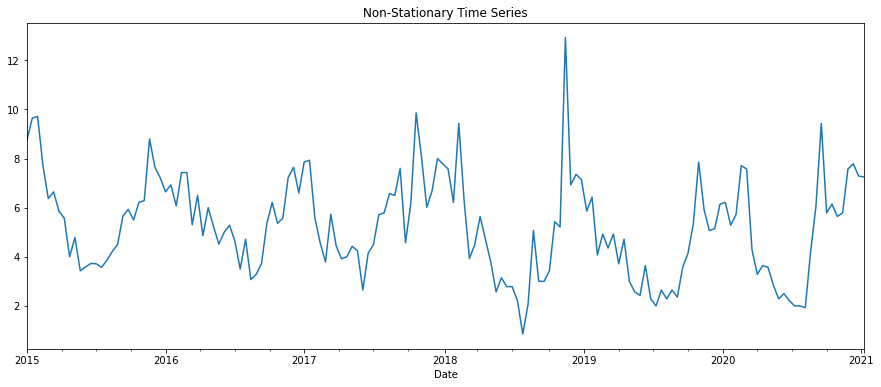

In [18]:
# Verifying & Vizualizing each pollutant's trend on a bi-weekly basis
aqi_co = df['aqi_co'].resample('2W').mean()
aqi_co.plot(figsize=(15, 6))
plt.title('Non-Stationary Time Series')
plt.show()

### Time Series Decomposition
This will allow us to capture trends and seasonility for each pollutants

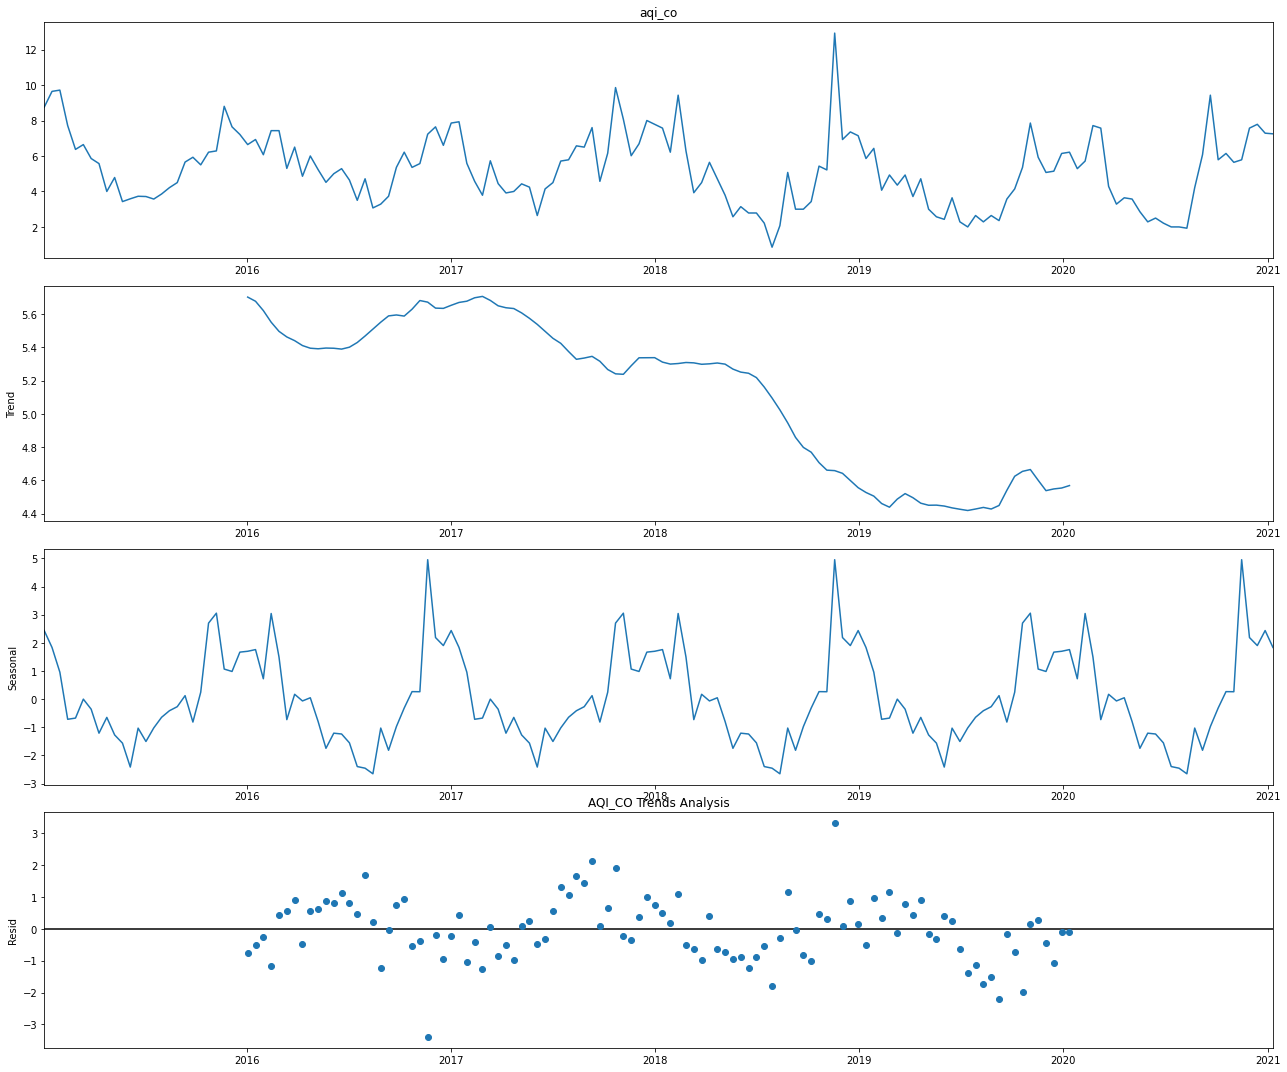

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 15
decomposition = sm.tsa.seasonal_decompose(aqi_co, model='additive')
fig1 = decomposition.plot()
plt.title('AQI_CO Trends Analysis')
plt.show()

### ARIMA Model
If we combine differencing with autoregression and a moving average model, we obtain a non-seasonal ARIMA model. ARIMA is an acronym for AutoRegressive Integrated Moving Average model (“integration” in this context is the reverse of differencing). The full model can be written as

1. Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for y(t) will be y(t-1)….y(t-5).

2. Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for y(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

3. Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

    1.Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
    
2. Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

In MA model, noise / shock quickly vanishes with time. The AR model has a much lasting effect of the shock.

In [21]:
# SAMIRA Model for aqi_co
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [22]:
# iterating through to find seasonality for aqi_co
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(aqi_co,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:986.9543022900251
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:859.6619632520319
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:725.8236114423751
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:767.5344504063138
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:585.1207068763624
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:522.4737661257734
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:870.6830989135592
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:669.5531907604881
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:525.4052670262996
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:760.8612669211477
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:644.9016011423475
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:567.2676462774855
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:565.3938186666597
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:543.574102285086
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:495.89473147522943
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:623.7761332981441


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:552.579163900872
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:490.0503095563545
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:564.1325651681973
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:535.4540732561065
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:526.6301008609227
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:516.9690729440106
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:508.71337818465184
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:501.3386272369765
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:545.1332457720006
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:506.1777711452306
ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:504.37055787692424
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:831.0134819587574
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:737.9341512686475
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:641.8826233423972
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:689.0637932366403
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:529.3122341486182
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:478.26283143516434
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:793.4826769825331
ARIMA(0,

ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:575.9987927200642
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:846.3319102198845
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:675.0359206644293
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:561.8953731189121
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:667.7193886761189
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:665.866240025448
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:619.8705490435174
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:681.7663772935882
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:634.4896156912862
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:577.1620192823053
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:718.7306610556739
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:656.3565582104119
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:563.8953201340479
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:620.7837701681667
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:622.6897696185888
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:620.060173772157
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:608.2558124650587
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:581.1048107478348
ARIMA(0, 2, 

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:516.897989309444
ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:482.42112211671497
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:535.4623807495403
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:497.9165451074357
ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:451.40205802986964
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:588.3316182456464
ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:515.9291238793487
ARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:458.3274987353456
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:490.8033764802495
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:492.1967259214937
ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:483.8742217103958
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:488.05001676396205
ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:472.290681113427


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:453.8187827533763
ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:519.767766454868
ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:482.84298652058726
ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:470.557517144257
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:571.2322899276212
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:536.2685851332244
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:500.95961471168323
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:627.7169186074665
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:492.83750211341044
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:454.1769902146546
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:728.2017333649173


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:561.9899579242982
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:455.00461436451565
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:536.184213380089
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:537.0332538478339
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:498.393525733062
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:525.3846718767549
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:493.6257157477961
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:449.6201414984464
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:578.8293616533208
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:519.3098575829873
ARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:461.6761858439176
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:500.9367901250203
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:492.24721715115965
ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:488.72595403349374
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:478.3375921642904
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:458.2707258155603
ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:456.3898446275217
ARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:511.4172228007684
ARIMA(1, 

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:450.3914597834566
ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:513.0857664913605
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:473.277262697526
ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:471.2108140723448
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:544.8451928489042
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:516.9895494172353
ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:481.156390510435
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:627.9350130926623
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:492.92758252833505
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:454.76898358756495
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:724.0873966783247
ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:558.9810633547446
ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:453.31531208728774
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:520.1714525002894
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:515.2846853606626
ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:481.61582420917557
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:526.4607314939208
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:494.3255251249303
ARIMA(1,

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:463.33829293093066
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:518.1941155836417
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:482.42646632822215
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:479.83005939460895
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:557.6556819099933
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:519.656246209831
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:483.55005614740696
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:628.0590110724502
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:500.68504064322804
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:458.8287883346747
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:722.9658892070007
ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:562.0408282029607
ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:454.9460625100948
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:524.0129729974515
ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:517.7509316209319
ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:483.46374509940506
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:533.1340096395365
ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:498.7326186560076
ARIMA

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:455.7446124366008
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:516.7779851682925
ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:474.75243002142656


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:461.57115869992265
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:560.6077426519125
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:528.482891250162
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:493.04045885146206
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:622.7769404643949
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:492.64861765931704
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:454.42500471654273
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:723.0621743125886


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:561.2325705020269
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:456.9744827098035
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:525.4109097316359
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:533.3724366553297
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:494.8033476004963
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:518.8152775358624
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:490.89906797488374
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:450.0158506464856
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:571.2217439897918
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:512.381255164134
ARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:461.8253036503505
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:489.87300056726997
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:491.82306092831965
ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:485.76784431644137
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:473.65977695535776
ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:454.20415581901057
ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:452.59341815708706
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:504.5945566626991
ARIM

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:451.2469744138554
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:506.37608111414727
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:466.19386763316
ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:469.2706425517184
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:559.0878972742607
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:521.4362782101274
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:485.33372965977026
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:621.9587545614822
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:490.68530814995626
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:451.8408573290438
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:720.2140892983327
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:556.6048613192415
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:453.1096084470713
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:522.0431218837186
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:534.3433868998322
ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:486.04815870203146
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:521.64974237806
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:490.67671847271043
ARIMA(2, 

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:499.55691480504197
ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:467.61863829139077
ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:467.2678369573695
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:557.3567247760766
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:521.5391663984535
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:486.78081501312386
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:630.8414214366776
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:502.24981708241154
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:459.8689369138806
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:727.6536209856927
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:565.8501527172876
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:460.3420536358129
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:517.7256502136659
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:519.2887743823858
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:487.6894672375388
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:528.4248780402756
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:498.0170949096321
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:458.54236459312267
ARIMA

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:458.46382459338423
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:724.7190256185615
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:563.6605304742834
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:456.5912978816862
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:513.2788726303727
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:513.5872280254368
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:479.334120647503
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:529.8810725939262


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:498.58323161460635


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:460.64922588309696
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:579.7269537407549
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:519.2477803256784


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:466.3279170924244
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:478.1153232557171
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:479.6472396708326
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:481.58473439819363


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:481.2797449279947


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:461.6938135543843


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:465.3112241983694
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:511.060027150559
ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:471.3467612089512
ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:462.7051923641868
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:553.1113321762239
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:517.5923634632377
ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:482.46678455561187
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:622.4883230041901
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:493.4770680602679
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:456.1027173125559
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:720.1216007302637
ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:557.971840050528
ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:454.9223096869739
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:518.8992579665369
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:516.9407251459188
ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:483.15847491745075
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:524.3575860213997


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:496.1285320477371
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:448.4282826437625
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:573.9411043930054
ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:517.0632513442667
ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:458.83990439429505
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:484.0731302931432
ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:485.7838296997679
ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:484.50710686987964
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:478.6535188398549


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:458.83572635708157


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:449.994211917856
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:507.0762850335513
ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:470.8745187361597
ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:469.13097196050757
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:621.4328349394725
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:586.955204257934
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:547.3379590246614
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:678.9937385873861
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:557.2637323762818
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:512.9464634330516
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:768.2995130560357
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:608.7959173096432
ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:508.96077453982605
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:583.9128475438232
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:585.8904278839643
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:549.2013355488255
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:587.245185218837
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:557.9532922786855
ARIMA(2, 2,

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:462.0919085743474


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:462.5788734492883
ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:513.732662186746
ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:476.74271663487457


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:463.1475201852595


In [23]:
mod = sm.tsa.statespace.SARIMAX(aqi_co,
                                order=(2, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3725      0.586     -0.636      0.525      -1.521       0.776
ar.L2         -0.1567      0.295     -0.532      0.595      -0.734       0.421
ma.L1        -12.0582     82.489     -0.146      0.884    -173.733     149.617
ar.S.L12      -0.6584      0.058    -11.396      0.000      -0.772      -0.545
sigma2         0.0213      0.292      0.073      0.942      -0.550       0.593


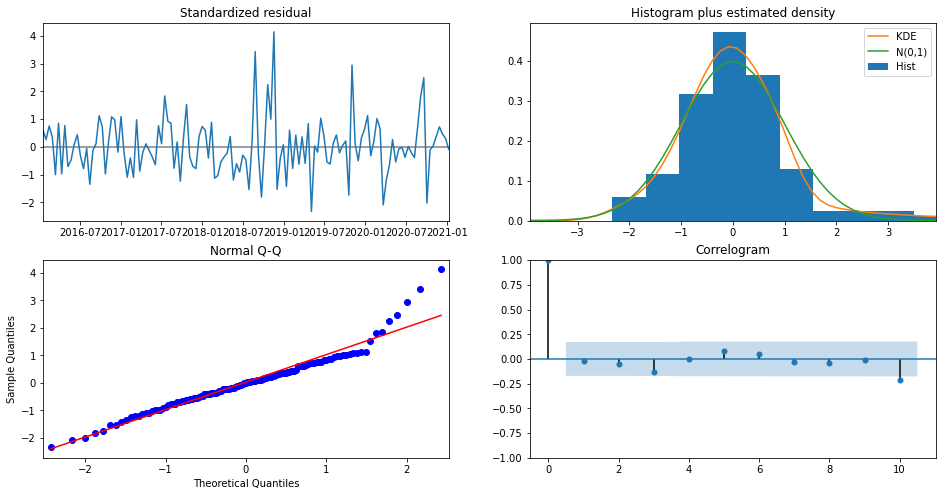

In [24]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

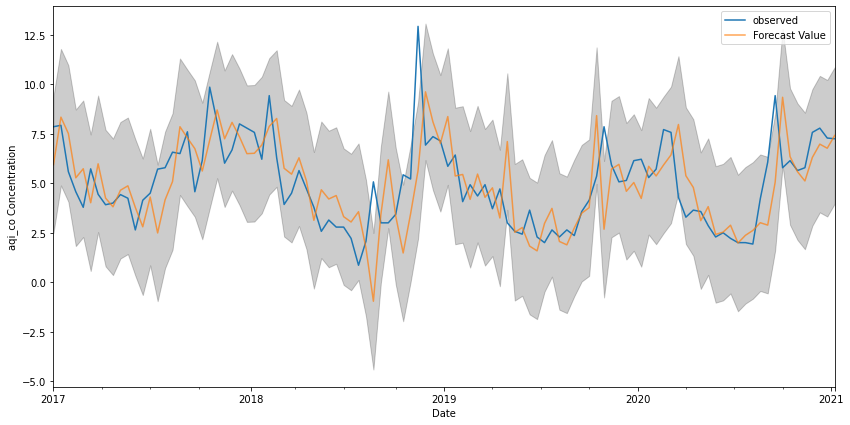

In [25]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = aqi_co['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast Value', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('aqi_co Concentration')
plt.legend()
plt.show()

In [26]:
y_forecasted = pred.predicted_mean
y_truth = aqi_co['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 3.45
The Root Mean Squared Error of our forecasts is 1.86


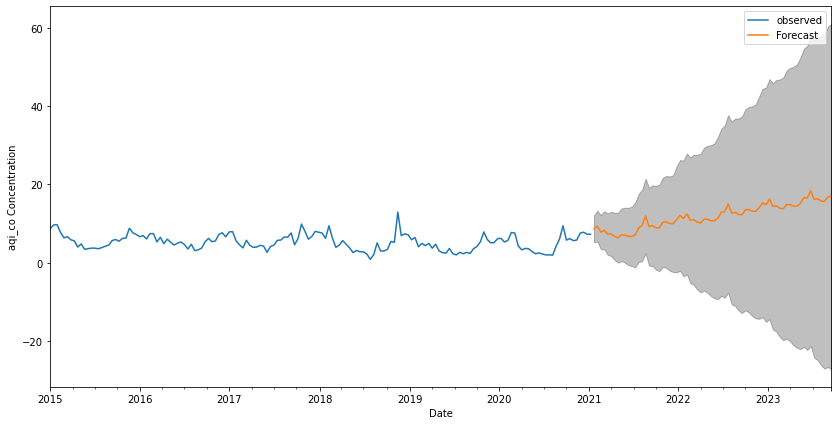

In [27]:
# Forecasting for next 3 Years
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()
ax = aqi_co.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('aqi_co Concentration')
plt.legend()
plt.show()

### Considering aqi_no2

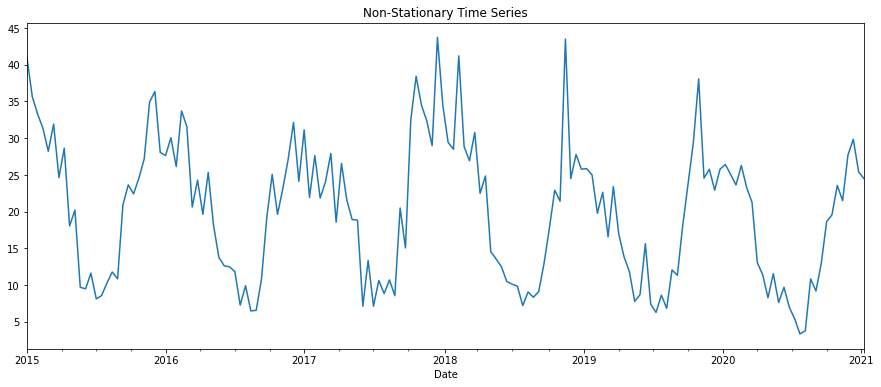

In [59]:
# Verifying & Vizualizing each pollutant's trend on a bi-weekly basis
aqi_no2 = df['aqi_no2'].resample('2W').mean()
aqi_no2.plot(figsize=(15, 6))
plt.title('Non-Stationary Time Series')
plt.show()

### Time Series Decomposition

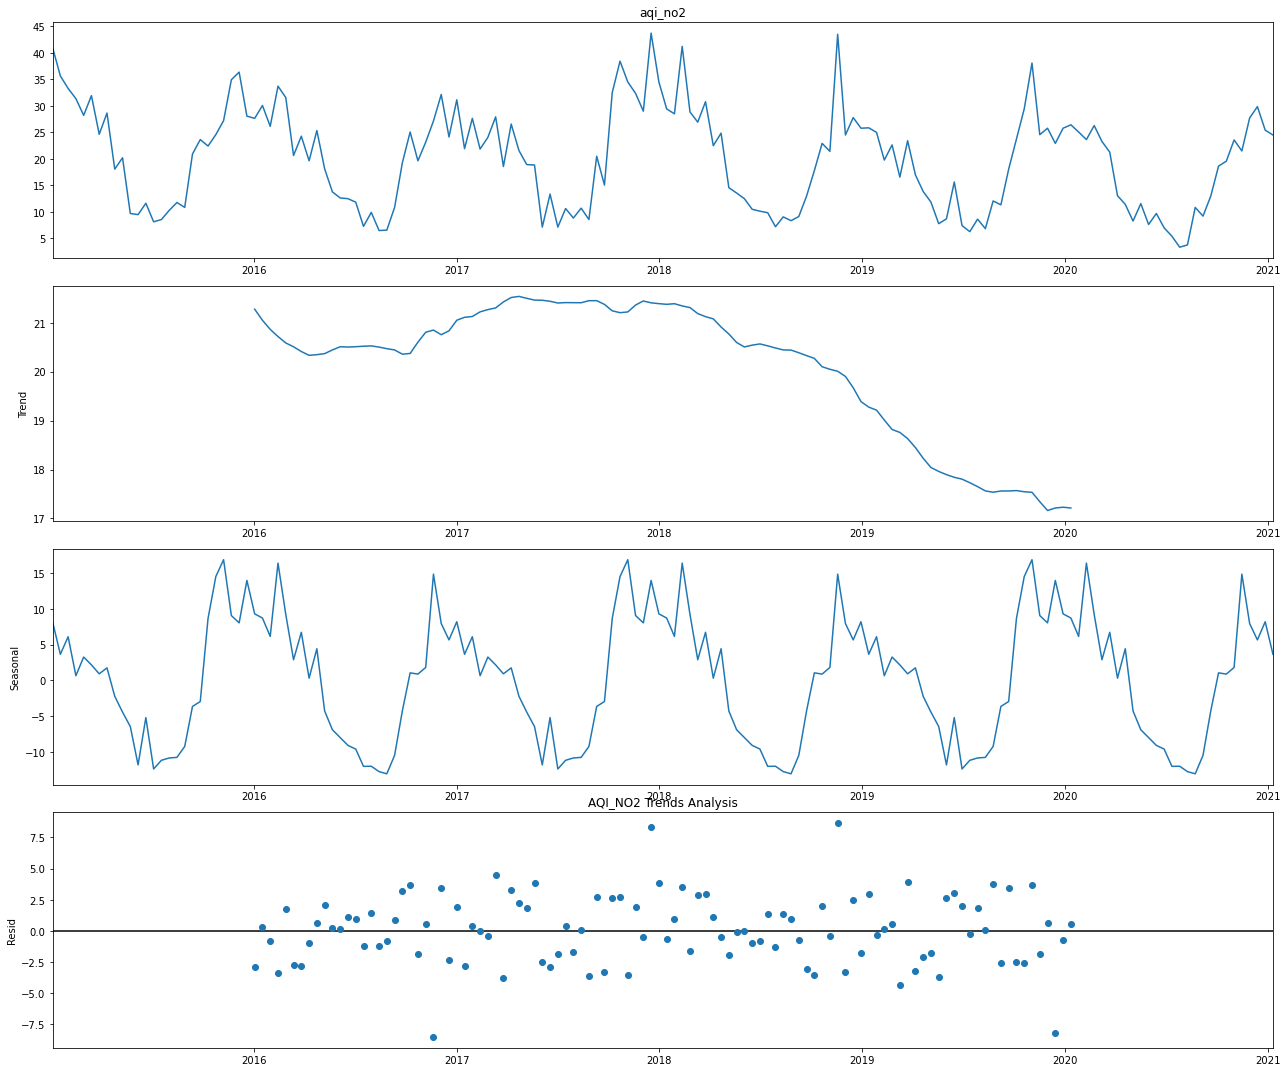

In [60]:
# Seasonal Decomposition NO2
rcParams['figure.figsize'] = 18, 15
decomposition_no2 = sm.tsa.seasonal_decompose(aqi_no2, model='additive')
fig_no2 = decomposition_no2.plot()
plt.title('AQI_NO2 Trends Analysis')
plt.show()

In [61]:
# SAMIRA Model for aqi_no2
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [62]:
# Model fit - iterating through to find seasonality for aqi_no2
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(aqi_no2,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1417.8853402590616
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1274.646264482125
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1075.9889609152256
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1232.220358809126
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:993.6845072285855
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:882.692388033332
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1306.7257267380287
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1052.094062607958
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:859.0284638145152
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1216.693672557264
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1095.337382803798
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:976.4046713020819
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:924.2590630521239
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:914.4656930720946
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:833.5833643309851
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:941.6353632739338


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:874.9078357406421
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:781.8364067953527
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:919.8018672442013
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:914.9467818614962
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:899.9792226007471
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:845.3815588599875
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:839.8771959802278
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:835.4381632269357


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:819.168505734817
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:821.6243515558133
ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:775.6083565789685
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1261.6775152666441
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1145.695598309758
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:985.1158308644679
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1138.9785956858072
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:926.1573871230345
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:832.1692777599296
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:1215.315561010912
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:979.468161683749
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:806.0049138619725
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1123.6056736532028
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1018.8104476842407
ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:917.5986187947833
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:903.152377081241
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:885.8632324054736
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:801.0824831395273
ARIMA(0, 

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:734.461488639013
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:870.5369429699699
ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:868.7527960315415
ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:843.1039657284805
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:798.5434137800394
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:798.0597945997656
ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:776.978123796375
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:784.081818530176
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:753.9545109039277
ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:734.8812466533036
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:994.4282971013522
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:919.3981312532742
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:844.7841570680042
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1043.971170815787
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:871.8416444555337
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:792.3322194032223
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:1118.8171356716957
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:902.8637193753182
ARIMA(0, 1, 

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:761.469971374781
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:977.4069553624895
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:895.9541601164126
ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:814.6198256700443
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:1021.2962042677747
ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:854.710249281353
ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:773.5470634797355
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:1092.9043818190578
ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:880.2159273805112
ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:741.2835134142382
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:909.7777537392833
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:887.2131121359755
ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:808.6169415112178
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:873.140663131599
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:847.4176875279377
ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:759.3394362714532
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:890.8898257278145
ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:816.1790027116061
ARIMA(0, 2,

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:733.0721105304497
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:998.65833526644
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:925.2380261528419
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:849.7328997755876
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1040.8406820878972


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:863.8787210321934
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:786.2014476586847
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:1119.0406414456943
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:902.3604652981504
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:760.1685064295746
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:924.0229115189412
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:925.4170204632334
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:848.8869388770477
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:874.7939740298467
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:859.7365144941073
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:776.4433237642821
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:894.860164373855
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:836.6150221875074
ARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:751.3702396730519
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:851.6514751875828
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:853.3146385604997
ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:853.1159450176259
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:792.9433489292356
ARIMA(1, 0

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:739.878625938504
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:971.1800918650406
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:899.8477333378167
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:817.7369934759597
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:1013.9342644398236
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:842.1223885839847
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:765.5507905883862
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:1091.2354692099073
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:874.9507627784145
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:739.2762389308939
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:908.1305776298011
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:894.0619780618441
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:814.5917281676998
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:860.9649116131695
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:841.2370976206641
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:756.8618762528668
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:879.7455115348934
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:811.7250700404652
ARIMA(1, 

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:744.6625155968491


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:731.4909879206826
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:1038.0739339662405
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:966.0166705737581
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:885.6175348479057
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:1066.1525647175827
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:907.1655713247649
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:825.7090088144603
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:1134.5841111752698
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:919.331155815568
ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:789.713809022061
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:965.9794603077751
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:967.9792911911074
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:886.724520284168
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:930.8262516163468
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:909.163640287491
ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:825.6216311128428
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:939.3027074407948
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:886.4051779669855
ARIMA(1, 2,

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:766.0851791826503
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:769.778523304625
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:741.7229348180553
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:735.6795353123213
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:968.5957161578528
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:894.5422362356454
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:812.6813706407443
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:1020.2972832286084
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:848.9754163464322
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:771.3511622319031
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:1092.2558202438026
ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:878.3608239926289
ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:738.1513493443119
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:902.9481458345367
ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:887.142824104372
ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:807.6166113111262
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:864.4087939105236
ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:846.6851643156639
ARIMA(1, 2

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:814.6743345048139
ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:728.2065120827829
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:824.225181528365
ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:825.1080007567922
ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:807.8517061459727
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:784.2244587096395
ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:780.5742210137811


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:762.8548083686017
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:771.193352934225
ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:764.930300307993


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:744.2546759186267
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:977.1274962130751
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:909.4648933879115
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:828.6098568038019
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:1029.2524278431351
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:855.1317157852875
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:778.0607545750057
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:1108.4432720827149
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:895.3972421355927
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:754.3022947831103
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:900.6480297447156
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:898.0087070482441
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:825.198264084103
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:852.2350036646511
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:846.0231371656832
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:766.6600308035993
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:869.3425423577097
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:815.0952384486072
ARIMA(2, 

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:754.3885595834489
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:822.9840011288902
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:824.2555717702169
ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:837.757912998861
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:775.8250984025702
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:771.6659253885773
ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:765.073884641434
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:763.9736916519746
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:735.3877398609385


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:737.3800223356089
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:970.3731194099269
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:899.970130041254
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:819.2590965556317


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:951.0316567088194
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:824.2549719033643


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:753.0491132623174


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:1018.8505336686436
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:823.4358484262065


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:716.5065422171017
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:903.6521131210055
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:895.8089179454787
ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:815.9964080799601
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:855.9820451181566


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:830.7690692580122


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:753.6606095402051
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:872.873646958087
ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:812.6370312086369


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:722.8195223939838
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:824.9708826175869
ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:826.2508802319654
ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:833.1252124499509
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:777.3668840236165


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:760.6136984682328


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:758.086688802096
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:765.910264107923
ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:737.3774540080233
ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:731.5227122408854
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:972.0221994404131
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:904.6371964846519
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:824.1458316807498
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:1021.2145534216143
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:856.0891287014404
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:779.0266751723757
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:1096.6571107970758
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:886.7192819678412
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:751.6807484705171
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:895.7917982115711
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:892.5168137845126
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:819.0329256380344
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:857.6737557879767
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:850.3349958375278
ARIMA(2, 1

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(1, 2, 2, 12)12 - AIC:742.1132894410568
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:816.8266898375508
ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:817.993014385705
ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:813.8335499639696
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:777.6340230966175
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:773.7553296038798
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:767.0668823144771
ARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:762.3844299045246
ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:734.9987631333784
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:736.4348151840769
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:972.1166614340225
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:896.7951571656932
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:815.2311724213425
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:1019.8965966413125
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:851.174552302306
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:774.9595924973584
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:1095.4208564355372
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:879.8461364967999
ARIMA(2, 1

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:759.5607398670033
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:761.505881722459
ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:735.1734922153745
ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:730.2246294343514
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:1006.199407167499
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:940.8473589671594
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:860.3750305898673
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:1041.4127621213697
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:885.2731099876593
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:804.7548999292744
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:1111.5920873893788
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:903.4016280902138
ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:773.6810992574201
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:934.9404164620869
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:936.8739764482184
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:860.9135656256044
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:899.9798638738403
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:880.8704603505472
ARIMA(2, 

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:761.0808993399451
ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:760.5329079593296
ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:735.1366400212354
ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:730.3684545894583


In [63]:
mod = sm.tsa.statespace.SARIMAX(aqi_no2,
                                order=(2, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3758      0.095      3.938      0.000       0.189       0.563
ar.L2          0.3606      0.087      4.133      0.000       0.190       0.532
ma.L1         -1.0000    203.756     -0.005      0.996    -400.355     398.355
ar.S.L12      -0.7476      0.059    -12.665      0.000      -0.863      -0.632
sigma2        35.3425   7200.951      0.005      0.996   -1.41e+04    1.41e+04


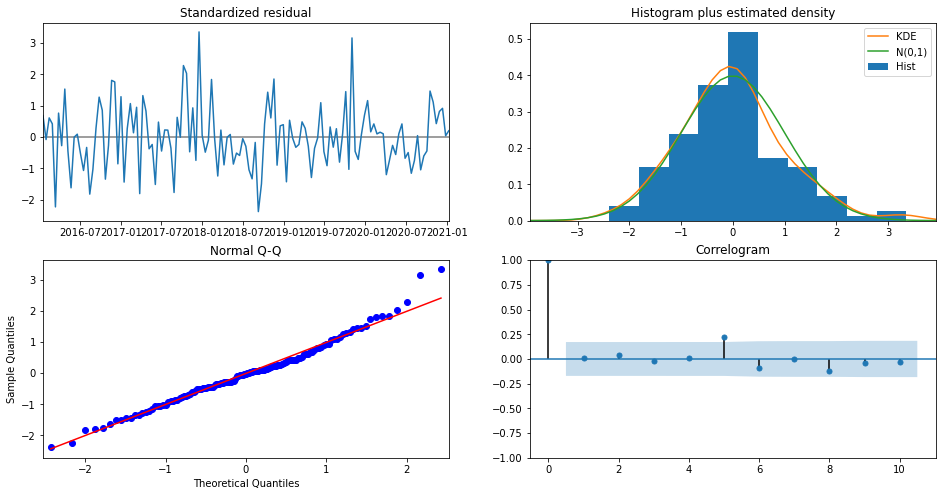

In [64]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

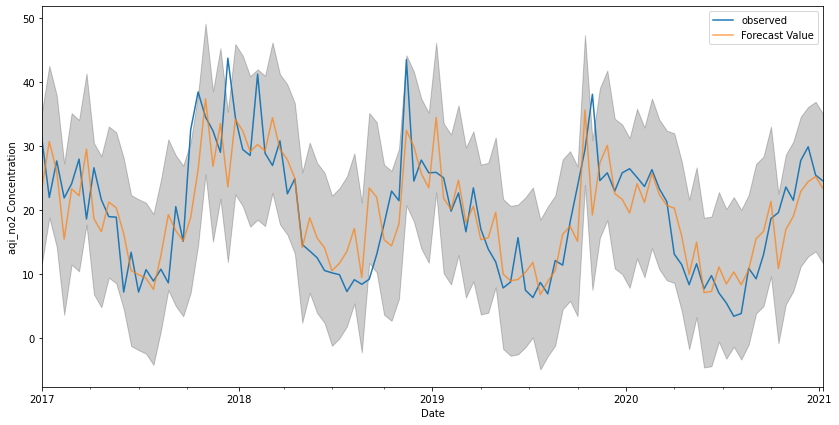

In [65]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = aqi_no2['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast Value', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('aqi_no2 Concentration')
plt.legend()
plt.show()

In [66]:
y_forecasted = pred.predicted_mean
y_truth = aqi_no2['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 34.51
The Root Mean Squared Error of our forecasts is 5.87


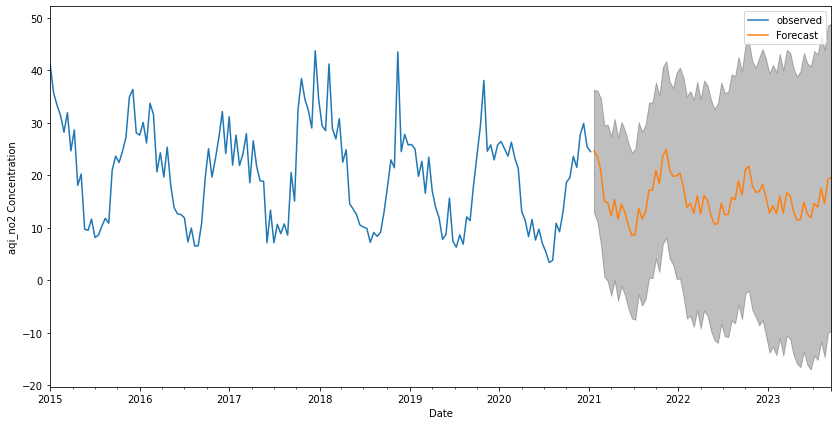

In [67]:
# Forecasting for next 3 Years
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()
ax = aqi_no2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('aqi_no2 Concentration')
plt.legend()
plt.show()

### Considering aqi_o3

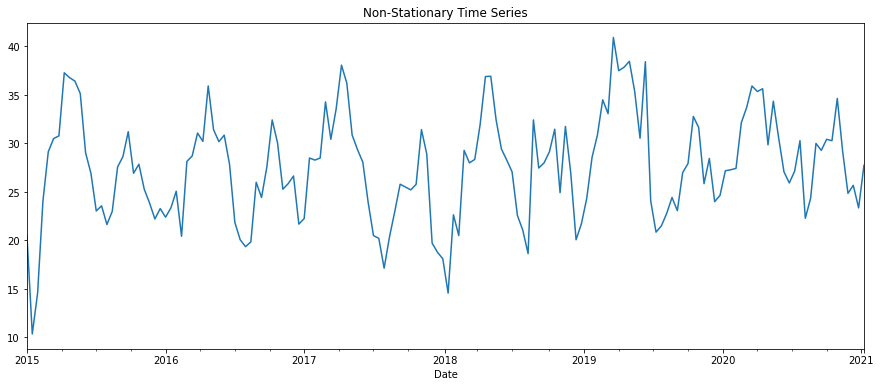

In [68]:
# Verifying & Vizualizing each pollutant's trend on a bi-weekly basis
aqi_o3 = df['aqi_o3'].resample('2W').mean()
aqi_o3.plot(figsize=(15, 6))
plt.title('Non-Stationary Time Series')
plt.show()

### Time Series Decomposition

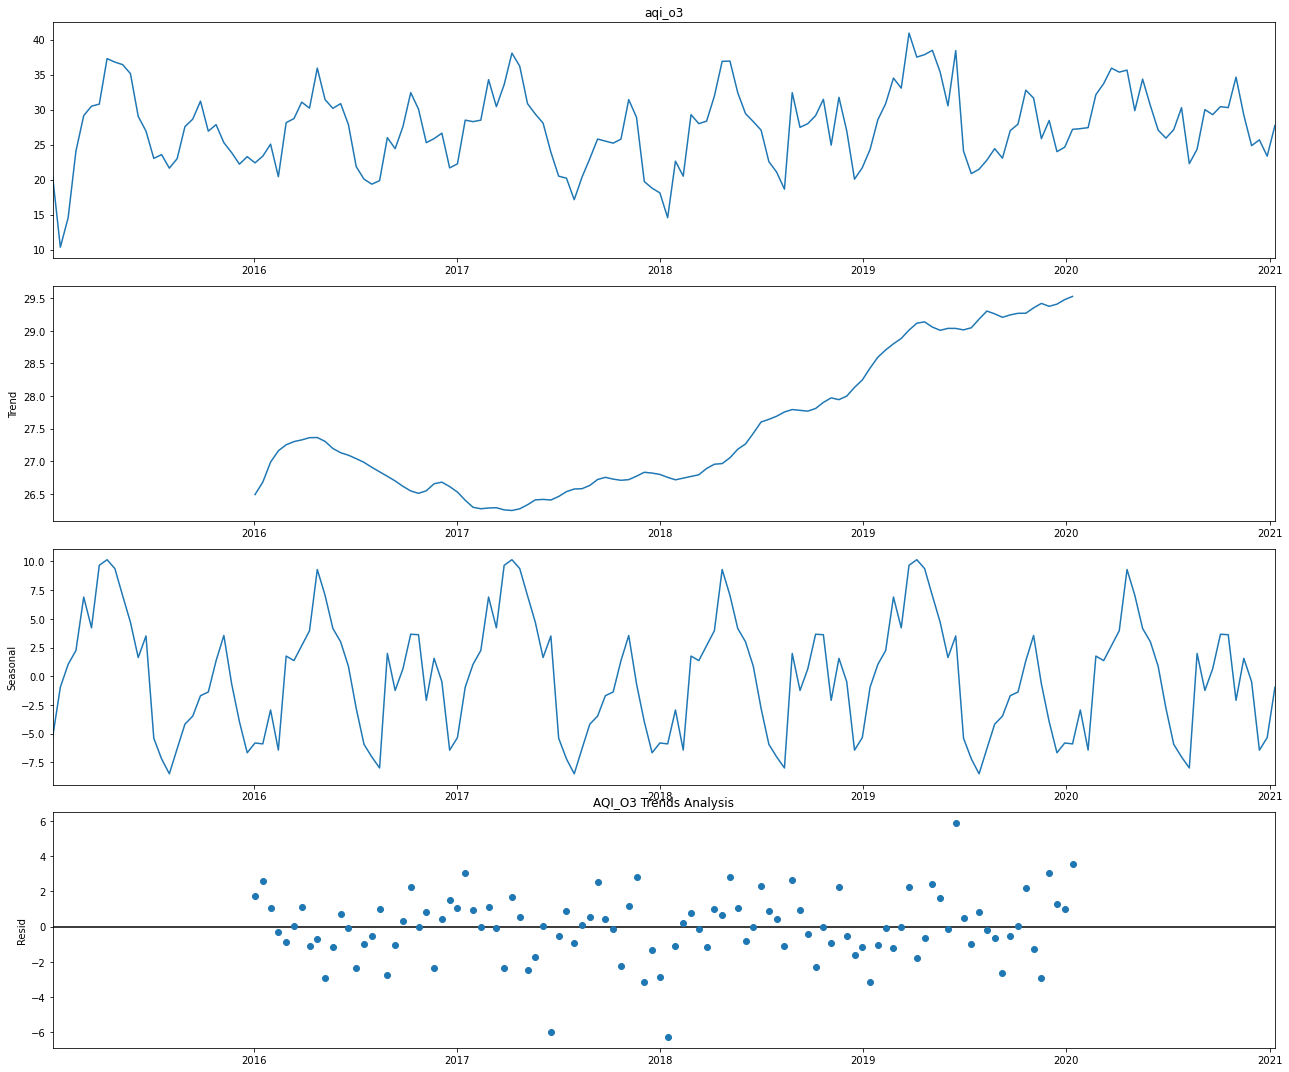

In [69]:

rcParams['figure.figsize'] = 18, 15
decomposition_o3 = sm.tsa.seasonal_decompose(aqi_o3, model='additive')
fig_o3 = decomposition_o3.plot()
plt.title('AQI_O3 Trends Analysis')
plt.show()

In [70]:
# SAMIRA Model for aqi_co
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [71]:
# iterating through to find seasonality for aqi_co
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(aqi_o3,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1495.2914886477856
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1258.7287731058627
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1073.730648122339
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:966.7105380941357
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:839.365459737558
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:754.4948801939082
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1045.8527570094489
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:837.7642353838213
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:725.9306480771711
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:972.5743231537426
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:923.9620086958877
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:830.8842088247675
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:822.7737709460312
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:819.4400029918204
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:747.1606038562783
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:818.9612622283694
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:779.7010934223429
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:710.9070393596456
ARIMA(0,

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:712.8043241184384
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1305.6651163140211
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1124.8335011330287
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:970.803218054865
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:903.0479933367128
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:778.5212491132104
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:700.2334859545473
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:989.0741993502304
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:787.1732467667161
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:671.9268312010404
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:916.5349721448886
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:853.7640051450198
ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:776.1682384815309
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:778.701044098178
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:766.7771339189774
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:697.3192042469904
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:790.0494472019238
ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:736.680159273482
ARIMA(0, 0,

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:783.9917495756213
ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:771.2029949927621
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:709.6804310002458
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:709.9771332978041
ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:699.3453603131832
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:697.7907637871733
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:677.842895153939
ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:667.3484927196887
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:1174.4202544243458
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:1019.2208695215364
ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:898.5267723043053
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:865.1743983809388
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:748.0827435456614
ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:676.8175089689366
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:946.679651883641
ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:755.7139721727593
ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:645.4738012256353
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:881.6837138020453
ARIMA(0, 0

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:763.3627459852316
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:762.1454637002687
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:743.3667786391887
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:676.9176100455825
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:780.2110747696944
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:716.5511269156514
ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:645.2579255693296
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:763.8647015970132
ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:762.6149593261151
ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:746.6662351054764
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:693.465213525737
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:694.2859131647391
ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:679.5204844612005
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:681.9576271988084
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:663.5785573822635
ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:647.0219931332337
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:875.9352479516516
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:805.2505294121429
ARIMA(0, 1,

ARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:654.1626231238099
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:867.4021024189451
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:793.1508667979912
ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:726.6862593857406
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:857.1181379996253
ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:750.3433289076702
ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:674.0627869872583
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:933.463756885325
ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:748.7559881008033
ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:645.525735265633
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:806.4125938293515
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:791.5424325976574
ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:726.1239415053456
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:769.0535286945872
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:746.7621144797495
ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:675.6782202230238
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:784.6420696198794
ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:723.551228035266
ARIMA(0, 2, 2

ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:684.5125747072017
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:768.0727312355128
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:716.8393981523927
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:653.2914237673151
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:735.0446528832143
ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:736.9365904965863
ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:733.194772286629
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:676.630160004621
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:677.921740791689


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:673.6922586563253
ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:671.9042538241745
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:657.3428654787805
ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:644.4333302270092
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:847.0049267243846
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:795.6355583101636
ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:716.2916859814391
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:856.5373414750985
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:751.0738684753924
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:677.6361855731444
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:933.5843189368941
ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:750.43006163818
ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:647.7932407869527
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:802.5644073637952
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:791.0601412085678
ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:716.4673695582235
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:761.7230189093656
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:748.4580042816758
ARIMA(1, 1, 

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:718.2934935773286
ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:647.9751651583076
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:737.180726362858
ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:738.9012740248195
ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:729.8339829748663
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:690.0787499616885
ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:691.8010996886447
ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:680.5630364780309
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:671.1494498376857
ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:658.4548865823225
ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:648.5609873532055
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:877.2231476664642
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:808.3032484201676
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:741.5959066041385
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:857.1552385073566
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:747.2193979835615
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:676.0375788695469
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:937.3883278579071
ARIMA(2, 0,

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:737.2606927397508
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:743.7927173704342
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:736.4463583409388
ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:670.2124995496928
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:766.4759018746679
ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:710.0561334711889
ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:635.0650909354713
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:747.9433797637948


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:742.8028900278725


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:736.1681265614061
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:673.9288765887841
ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:675.3651869214184
ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:672.7625073765607
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:660.234662428485


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:642.5980365729872
ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:633.3785835307174
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:872.3231397883251
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:803.1598070291316
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:737.1296707254672
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:868.1896406543824
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:759.752486240488
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:687.2507296612857
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:942.893354307388
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:760.6897480858144
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:657.984075772902
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:796.0360469575364
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:796.8021960474725
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:736.2720688330035
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:755.4217995801043
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:751.737031488069
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:689.2476112327633
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:774.2482793153683
ARIMA(2, 1, 0)

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:800.5102046291029
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:734.7046450363449


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:869.8533275482547


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:755.2737113345928


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:684.5267877075946
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:944.8891115320627
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:757.1581569318435


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:659.1191396080062
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:798.0923299953439
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:798.9592820461062
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:733.2225513543254


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:742.6920229197101
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:756.0256663186858


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:686.5022600801299
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:776.3906781522604


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:729.880214256093


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:657.0168571334264


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:732.583632083053


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:734.5570626076887
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:735.1816978948555


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:679.1590917137729


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:686.4471209597982
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:689.129967481777
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:668.047291592243


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:653.3213216977332


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:658.1877203400829
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:858.4576119546276


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:796.9518012252859


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:729.1816758505809
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:847.7892735323579
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:745.2540225461478
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:666.8302937593993
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:935.1423573866673
ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:745.5673000655053
ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:639.9630330370912


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:800.0596084973898


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:793.2894796764147


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:728.8508612870471
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:743.5909399032305
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:736.5748403386696
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:668.0109759418795
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:764.1274197451795
ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:713.2813964959945
ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:640.417436243998


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:734.6112622541644


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:736.6203961247282


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:732.3239746184333
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:674.698623524405


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:675.0697777389357
ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:669.3226699425869
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:658.6841646184278
ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:644.6463535387231
ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:640.3011810192364
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:903.0850868565935
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:841.7614660265226
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:776.4842523393091
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:915.4863516756322
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:794.2187575550279
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:720.1668844615153
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:988.2360734068961
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:803.258511769719
ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:683.398156826759
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:836.5408906546443
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:838.1822920359282
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:776.305481570179
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:799.2486686806905
ARIMA(2, 2, 0

In [72]:
mod = sm.tsa.statespace.SARIMAX(aqi_o3,
                                order=(2, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6233      0.091      6.851      0.000       0.445       0.802
ar.L2          0.0040      0.102      0.040      0.968      -0.195       0.203
ma.L1         -1.0000    262.224     -0.004      0.997    -514.949     512.949
ar.S.L12      -0.5715      0.080     -7.130      0.000      -0.729      -0.414
sigma2        15.3709   4030.777      0.004      0.997   -7884.807    7915.549


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



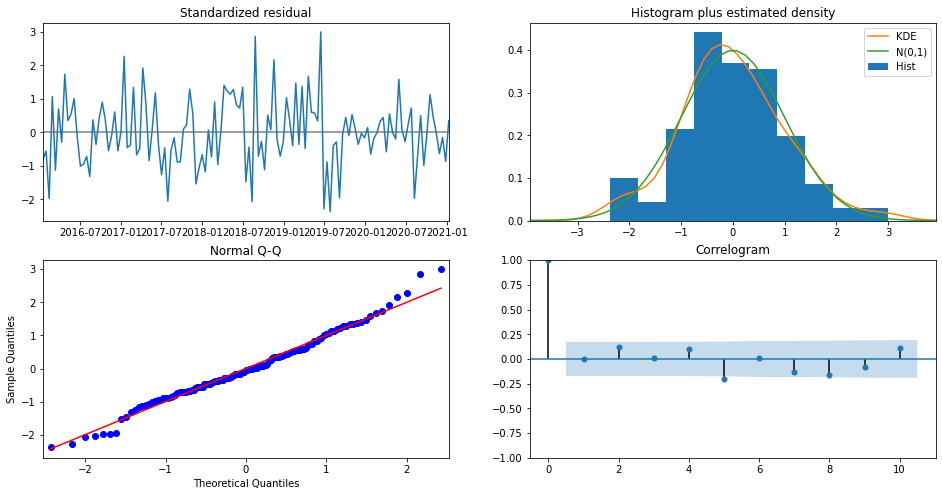

In [73]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

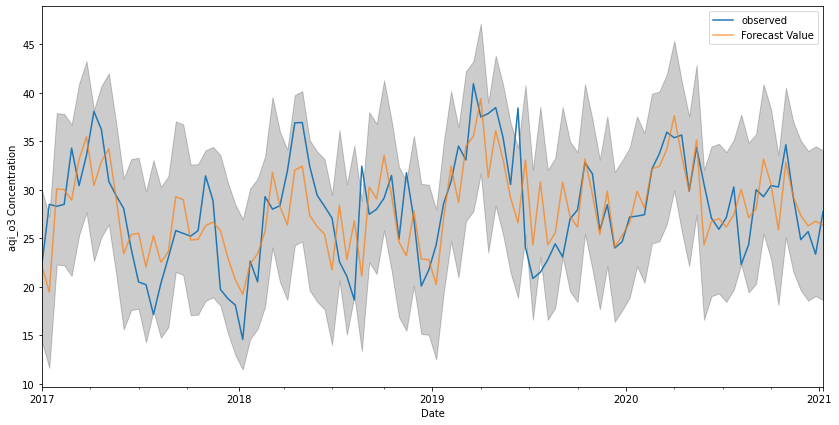

In [74]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = aqi_o3['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast Value', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('aqi_o3 Concentration')
plt.legend()
plt.show()

In [75]:
y_forecasted = pred.predicted_mean
y_truth = aqi_o3['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 16.45
The Root Mean Squared Error of our forecasts is 4.06


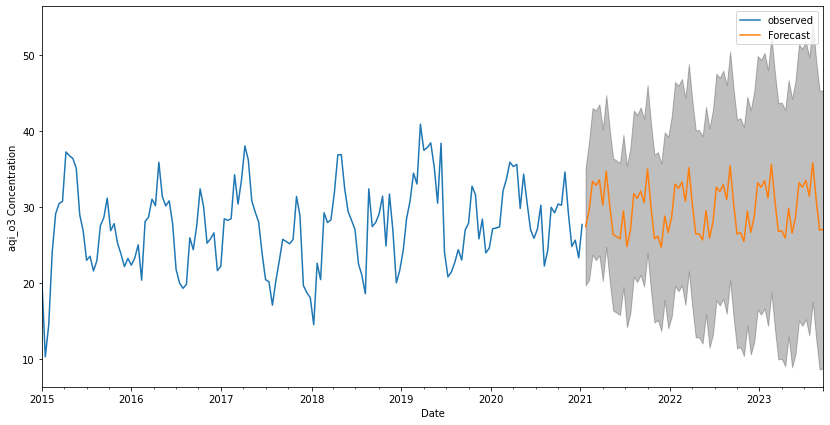

In [76]:
# Forecasting for next 3 Years
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()
ax = aqi_o3.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('aqi_o3 Concentration')
plt.legend()
plt.show()

### Considering aqi_pm_2_5

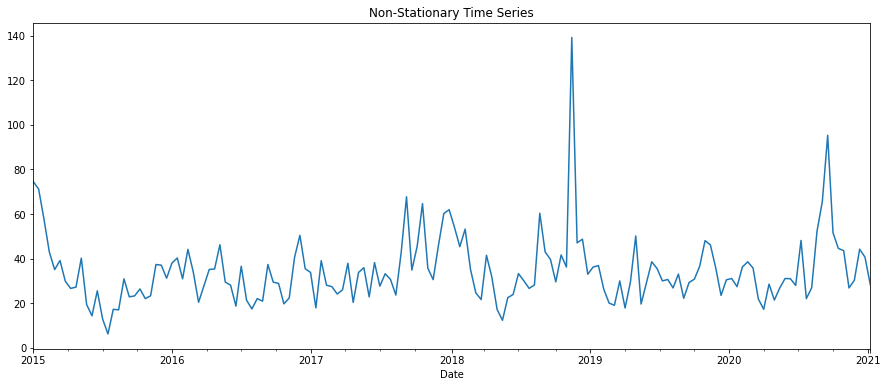

In [78]:
# Verifying & Vizualizing each pollutant's trend on a bi-weekly basis
aqi_pm_2_5 = df['aqi_pm_2_5'].resample('2W').mean()
aqi_pm_2_5.plot(figsize=(15, 6))
plt.title('Non-Stationary Time Series')
plt.show()

### Time Series Decomposition

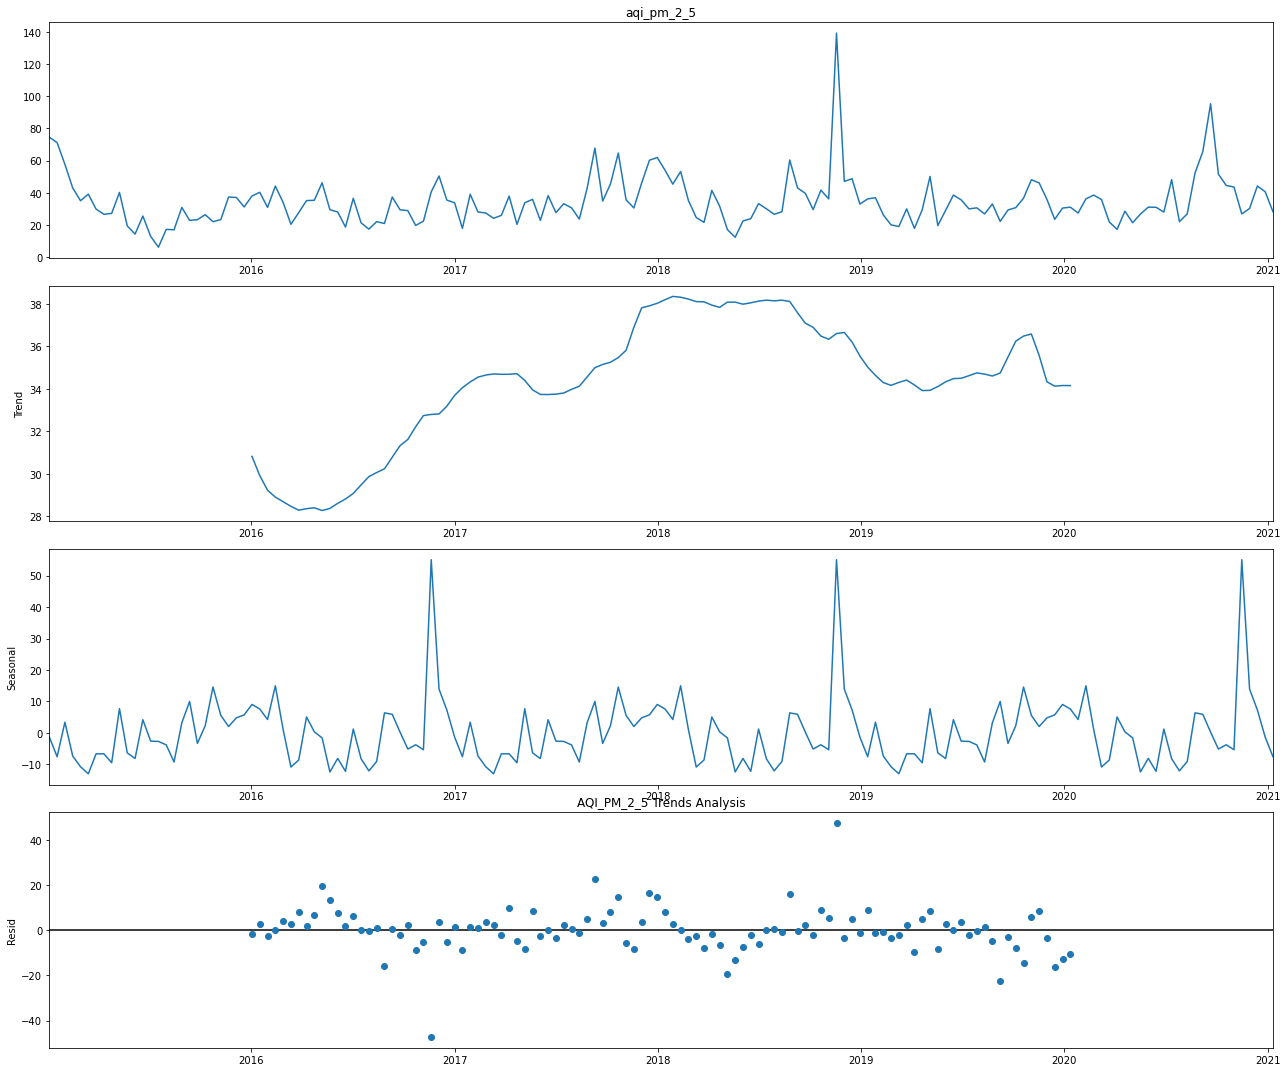

In [79]:

rcParams['figure.figsize'] = 18, 15
decomposition_pm25 = sm.tsa.seasonal_decompose(aqi_pm_2_5, model='additive')
fig_pm25 = decomposition_pm25.plot()
plt.title('AQI_PM_2_5 Trends Analysis')
plt.show()

In [80]:
# SAMIRA Model for aqi_pm_2_5
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [81]:
# iterating through to find seasonality for aqi_co
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(aqi_pm_2_5,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1584.7686862553314
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1406.320129169144
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1253.5553697582568
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1318.6234352003105
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1123.9450589805726
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:1033.679706456969
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1360.3734037697839
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1129.4155052866388
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:968.3739159812029
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1320.7119003238186
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1237.2198618759617
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1134.4667502568736
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1151.0405770282955
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1127.0506434044319
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:1021.8608992969254
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:1143.262988946239
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1079.882145852891
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:970.196444088624

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:957.2467959129671
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:1401.1987534744162
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:1267.7974753339613
ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:1160.0963911912804
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:1252.8684873682382
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:1093.093498708141
ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:1004.0039711208206
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:1288.2279771555145
ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:1083.360153079623
ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:944.0156975192132
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:1262.3183663624939
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:1193.2587637000277
ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:1102.511814517775
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:1142.8672871399554
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:1095.092841466166
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:1002.2845720984719
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:1135.6313499678708
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:1056.501521450992

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(2, 2, 2, 12)12 - AIC:950.7690836046745
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:1260.9575223716581
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1169.8838172948372
ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:1079.6441545264365
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:1262.2719668071657
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:1091.9187476318325
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:1003.5805396023693
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:1297.4723503519917
ARIMA(0, 1, 2)x(0, 2, 1, 12)12 - AIC:1086.9124202560663
ARIMA(0, 1, 2)x(0, 2, 2, 12)12 - AIC:939.9672591526822
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:1191.7012585972602
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1169.0242323325754
ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:1081.1144266104275
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:1141.9014417452609
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1093.7519568541143
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:995.1291301443208
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:1133.5148512609198
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:1056.162816070

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:943.41353075596
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:1467.7697472473037
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1360.2367391711646
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:1258.1476215309585
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:1431.3458646103727
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:1269.6370426807166
ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:1163.6084198828428
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:1446.381882113073
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:1233.3002702103104
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:1092.4886682697213
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:1368.9257996119732
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1362.1844385006973
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:1259.3737224017439
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:1312.5631931483406
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:1271.5497010110864
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:1163.7395105857772
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:1285.4145105159237
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:1224.4930624199

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:981.7871553389315
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:1266.7756269349302
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:1172.3136063173283
ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:1082.9200197479126
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:1261.2307298972719
ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:1099.0478951441373
ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:1004.7244051921356
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:1294.041229078863
ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:1088.3818762263911
ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:939.2825332749029
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:1194.3676329758332
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:1172.698133841258
ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:1084.8017861032022
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:1147.554026489292
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:1098.1328331634925
ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:998.4589255440243
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:1139.7437595013787
ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:1059.350107648398

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:940.3811796602996
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:1106.1802446782676
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:1108.0247992358463


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:1086.344833675405
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:1049.203356709811


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:1036.6435468473378


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:1018.0138665419599
ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:1018.1276301664099
ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:977.7838064519705


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:949.2179379442714
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1318.8113528282734
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1224.9082147226131
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:1134.5633444131538
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1270.6288922821539
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1104.3176213645115
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:1018.3309656258305
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:1309.2669637757585
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:1099.3999582328127
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:955.962882856111
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1224.4014426541457
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1207.5211203884865
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:1117.0985043140513
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1132.9304397198634
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1106.3175404151607
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:1014.4018513026392
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:1124.7030660519663
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:1072.050817973

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:953.4776642295816
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:1271.622624973892
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1178.6549851927102
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:1088.42225360958
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:1253.2317579940568
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:1093.2020633113152
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:1003.5741803718801
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:1289.5782995109153
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:1084.4974026684542
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:943.1395218516723


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:1192.673703812936
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:1191.9510176134577


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:1089.923517811168
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:1135.6430678776687
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:1095.2014977734575
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:1002.1651757874951
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:1128.3680732146292
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:1057.7244290629712
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:950.8446520405155
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:1101.9774374745105
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:1103.5128951405036
ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:1097.0704568397466
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:1038.0033149417807
ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:1021.1753242036327


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:1004.0853871979137
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:1010.0577192743079
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:971.8601606794327
ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:947.1207902004952
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1297.0731531202243
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1203.9595989714508
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:1114.8937122848076
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1286.8513475345976
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1125.2896700595634
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:1033.953899950239
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:1320.3236547625033
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:1112.0516922746465
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:972.227704360928
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1204.0196221285307
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1205.959593475181
ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:1116.7156976827707
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1157.9174032090987
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1127.287838993015

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:948.979176453366
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:1253.9054743695015
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:1164.7151003133406
ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:1077.7215636961528
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:1251.2305508970965
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:1088.3821118457995
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:1000.3417371873828
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:1289.3328147532716
ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:1081.0043212102823
ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:939.8547520620151
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:1180.8374826664676
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:1166.71477540738
ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:1079.7090997962214
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:1132.204489817148
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:1090.3810723093084
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:996.4022156130958
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:1124.4141934758477
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:1055.8695109332054

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:998.4046954071057
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:1004.400080095207
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:968.6354645170366


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:943.9137015248718
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:1392.7452945588507
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1291.138599555852
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:1194.1806897990425
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:1364.9738211332585
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:1205.252392762774
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:1105.7292558734475
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:1384.8605616960194
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:1176.2943800132857
ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:1039.4930423930095
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:1291.463373760128
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1293.1385986550636
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:1195.7209527911227
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:1239.125471883151
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:1207.208040130095
ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:1106.0614526876432
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:1219.9530667596136
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:1166.473390911130

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:1003.6641980969349
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:1288.9847177644256


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:1088.361771106879


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:937.5260211956444
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:1183.8147393910263
ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:1170.3015352773164
ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:1085.279398212287
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:1136.1524053155852


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:1094.973971303376
ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:995.4204478061205
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:1125.8369375859113
ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:1058.4443677225986


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:948.1296357052018
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:1098.2530053574346
ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:1099.908682707969
ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:1085.1205349508514
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:1038.0832625583537


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:1035.6255980849164


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:1015.0324275738436
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:1036.9548984520575


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:973.0783670734107


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:955.0973327106283
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:1293.6930950131205
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:1209.8830827825147
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:1120.5947968577943
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:1260.1082603773891
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:1106.5182307788082
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:1018.2137163235341
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:1299.2028979870388
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:1099.9599069133467
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:957.7691067049096
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:1202.3855708089313
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:1197.6349561918694
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:1116.9690363180366
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:1126.1638307773637
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:1100.5552622188454
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:1016.2467353267227
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:1117.0315339142421
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:1064.50256383

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:1183.2959164405902
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:1199.204615667672
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:1109.1181491209018
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:1127.855342635983
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:1102.1490534663308
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:1007.9412053327477
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:1119.0111934400948
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:1066.1605127400412
ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:953.3280039706617
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:1094.187868340095
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:1095.6708367358801
ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:1104.6736837242217
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:1030.4933269985095
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:1012.5830203896986


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:1009.9329084446276
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:1000.9785911730743
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:963.1668932908533


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:955.0801175240472
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:1265.216795532841
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:1175.9240398523914


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:1090.3834254926148
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:1254.8367859809841
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:1095.1290942547098
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:1005.5079756221529
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:1290.9411851377129
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:1086.2622611581166
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:945.1309621861304
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:1187.7037678149054
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:1193.8689981785346


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:1092.209536357505
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:1129.8553504927308
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:1097.1282790212895


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:1001.3332801024102
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:1114.4713900467536
ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:1059.7035752230079


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:947.1268543265271


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:1096.7623618209211


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:1099.2415559635756


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:1099.0665536616132
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:1032.4982120127045


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:1014.5628926750562


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:1006.4506682578906
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:1002.9771789420735
ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:965.0923778676109


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:949.4977031650648
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:1284.3878792496928
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1199.727182100738
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:1110.9758422010364
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:1278.4727957188304
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:1121.7161086699534
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:1030.5650750305351
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:1312.362308478424
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:1111.8566497869624
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:968.4354590408058
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:1192.0391676452323
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1193.8720867141265
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:1112.862058518078
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:1144.3880407373954
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:1115.31297370513
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:1029.6171665157933
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:1135.450252665034
ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:1080.3133598778863


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:949.4519649780461
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:1084.0647162781152
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:1086.0459413626734
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:1087.8383567869935
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:1026.609550332079
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:1009.8800767859157


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:1005.4099220843448
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:995.9342966156264
ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:960.0392747337494
ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:950.7701248911833
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:1255.7793155654108
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1166.6030230928668
ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:1079.1732454374428
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:1252.7672387027708
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:1089.6587674594016
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:1002.316231429354
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:1289.7495888540816
ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:1082.7967041947693
ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:973.8483946695947
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:1175.8598998675538
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:1168.6055265390592
ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:1081.145317779367
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:1125.4710318959383
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:1091.657909177481

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:941.6081309716546
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:1086.011352424943
ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:1087.9928085260512
ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:1081.9536725244486
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:1028.1388500573084


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:1011.8838136348724


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:999.8329248430641
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:997.6277527565749
ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:961.8684090378821


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:944.6714884820382
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:1356.6742758676378
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1268.261237140946
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:1173.7711078661496
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:1338.781385295677
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:1182.6451182108592
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:1085.6132801954157
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:1365.14850708731
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:1162.9929692357396
ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:1019.7433689701024
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:1259.9204667715107
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1261.919358042423
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:1175.527286195409
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:1207.5942692243098
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:1176.0963688438442
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:1086.0271417611732
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:1192.1675704878867
ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:1136.6333599704453

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(2, 2, 2, 12)12 - AIC:1012.480032830148
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:1284.126038840511
ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:1190.6611604239915
ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:1101.8653643299888
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:1275.6185884228278
ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:1116.083684776665
ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:1021.819602330286
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:1308.6621545839148
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:1102.811460844526
ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:958.0970904674878
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:1190.749342963343
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:1192.6453189591791
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:1103.862646530655
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:1143.6147422820904
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:1116.8561913457127
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:1020.3496627784888
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:1133.3037623170835
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:1081.233623481135
A

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:1022.3507097799404
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:1005.3611632253645
ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:971.8442243629067


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:962.3369123326833
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:1260.1610345941235
ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:1170.7042063764213
ARIMA(2, 2, 2)x(0, 0, 2, 12)12 - AIC:1083.663034096428
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:1255.035143205721


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:1094.4259716090273


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:1004.0020791508418
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:1301.7523994592875
ARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC:1083.0662403131278


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 2, 2, 12)12 - AIC:939.2137288204967
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:1177.6349882647403
ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:1172.0811725459316
ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:1085.2437842047575
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:1133.3386125940697


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:1094.7049077504876


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:1001.7115659831209


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:1126.209836242959


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:1060.3461178979542


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:986.7004374769998
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:1091.6627913121386
ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:1092.8368348795595


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:1086.708197513028
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:1033.5280625371165


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:1022.5866713157634


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:1009.0700144186414


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:995.9734371953772


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:988.664902734359


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:965.870636794657


In [82]:
mod = sm.tsa.statespace.SARIMAX(aqi_pm_2_5,
                                order=(2, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2810      0.075      3.767      0.000       0.135       0.427
ar.L2          0.0909      0.132      0.688      0.491      -0.168       0.350
ma.L1         -1.0000    120.027     -0.008      0.993    -236.249     234.249
ar.S.L12      -0.5343      0.050    -10.643      0.000      -0.633      -0.436
sigma2       281.0479   3.37e+04      0.008      0.993   -6.58e+04    6.64e+04


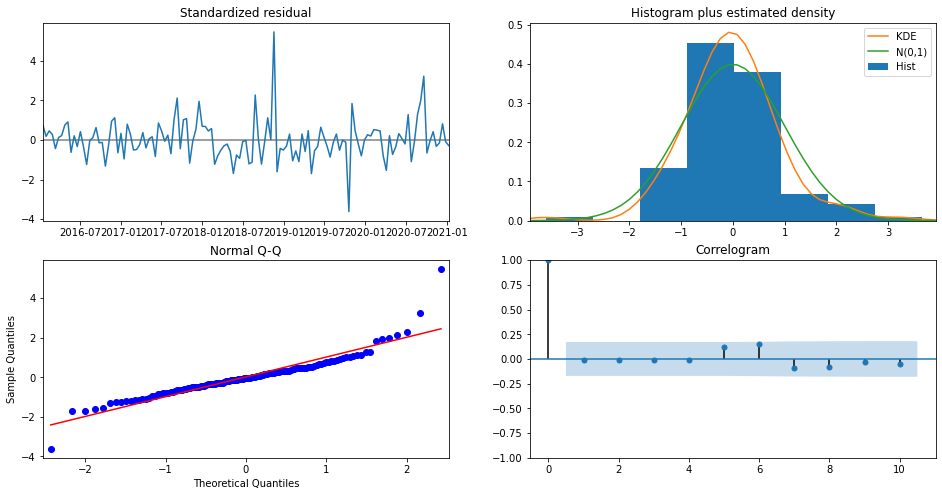

In [83]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

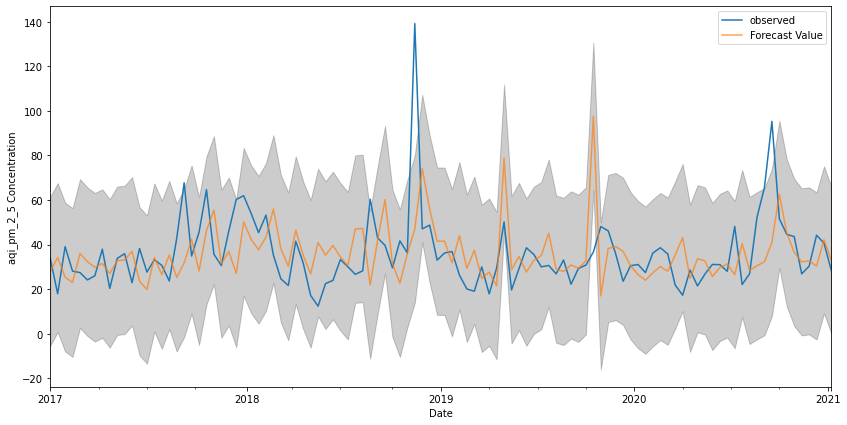

In [84]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = aqi_pm_2_5['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast Value', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('aqi_pm_2_5 Concentration')
plt.legend()
plt.show()

In [85]:
y_forecasted = pred.predicted_mean
y_truth = aqi_pm_2_5['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 325.61
The Root Mean Squared Error of our forecasts is 18.04


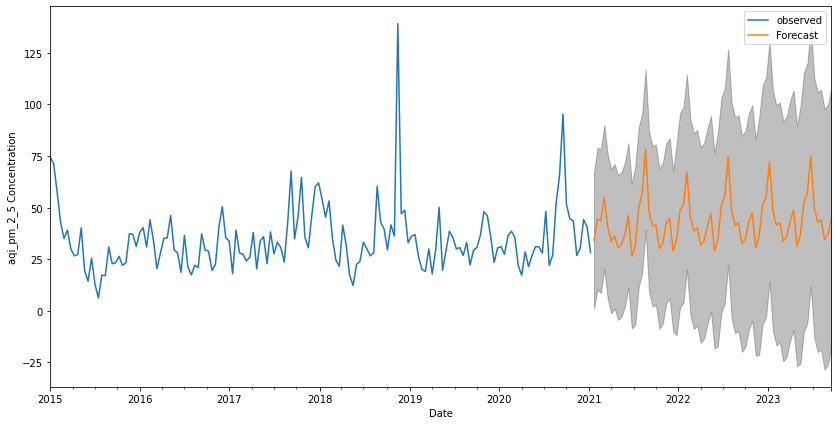

In [86]:
# Forecasting for next 3 Years
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()
ax = aqi_pm_2_5.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('aqi_pm_2_5 Concentration')
plt.legend()
plt.show()

### Considering aqi_pm_10

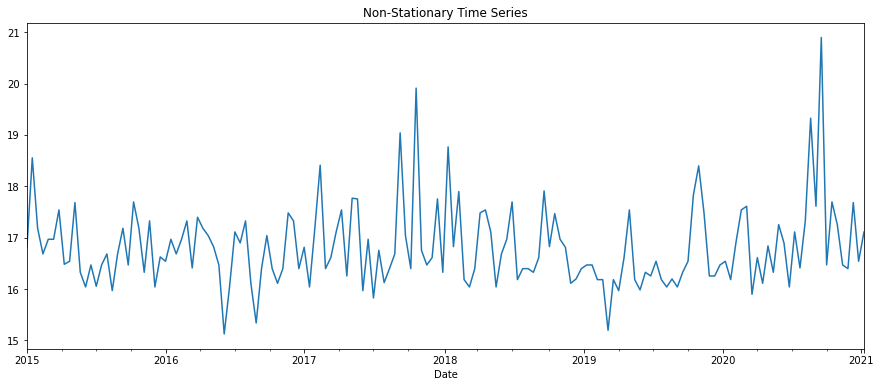

In [87]:
# Verifying & Vizualizing each pollutant's trend on a bi-weekly basis
aqi_pm_10 = df['aqi_pm_10'].resample('2W').mean()
aqi_pm_10.plot(figsize=(15, 6))
plt.title('Non-Stationary Time Series')
plt.show()

### Timme Series Decomposition

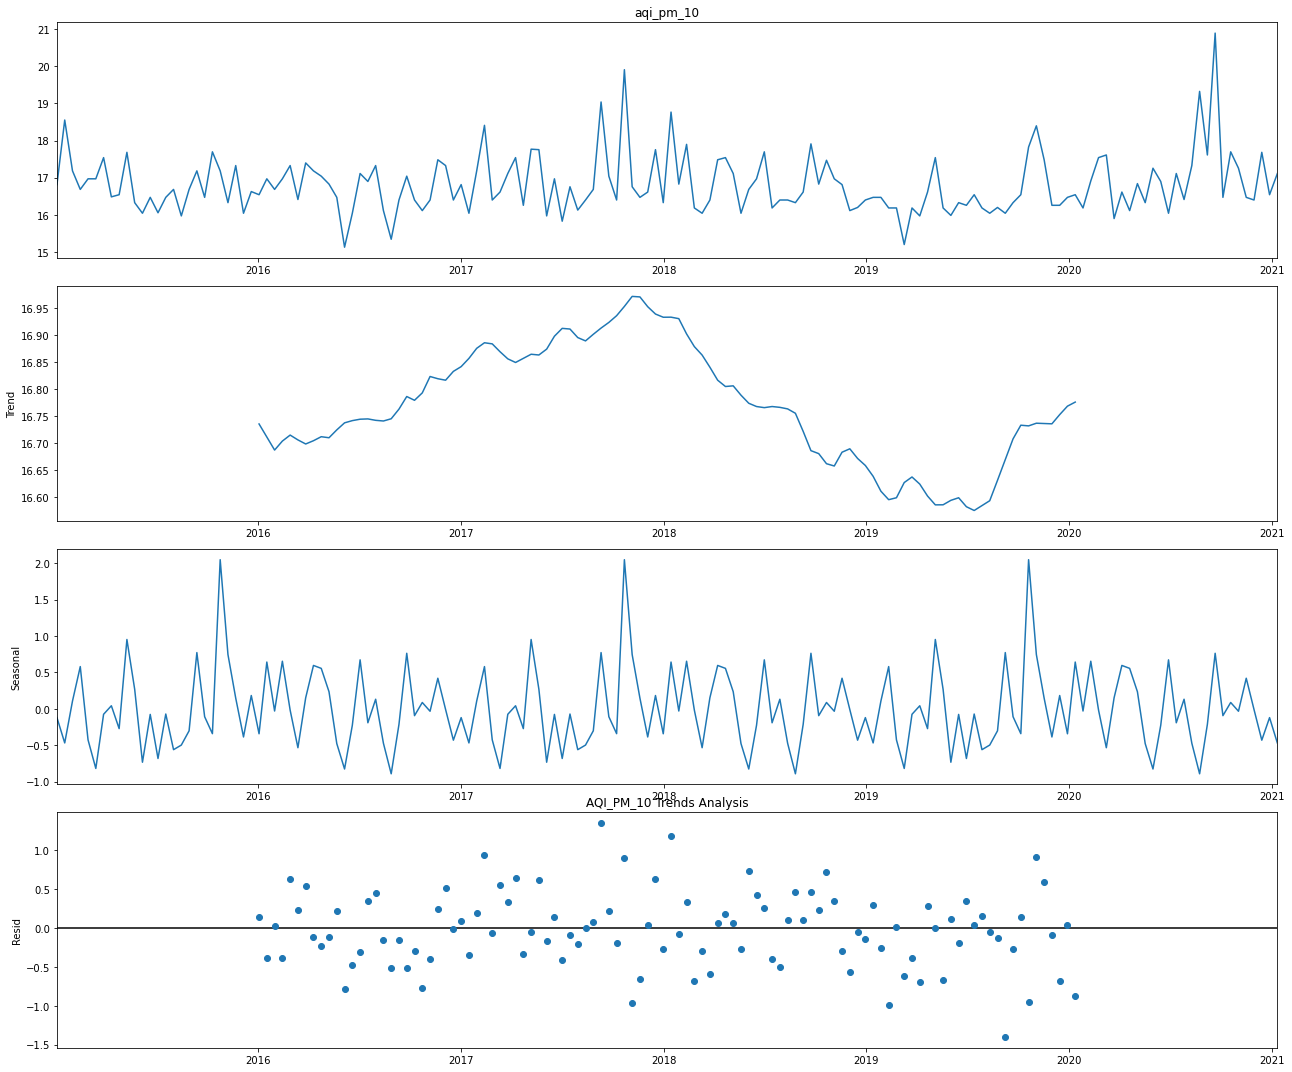

In [88]:

rcParams['figure.figsize'] = 18, 15
decomposition_pm10 = sm.tsa.seasonal_decompose(aqi_pm_10, model='additive')
fig_pm10 = decomposition_pm10.plot()
plt.title('AQI_PM_10 Trends Analysis')
plt.show()

In [89]:
# SAMIRA Model for aqi_pm_10
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [90]:
# iterating through to find seasonality for aqi_co
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(aqi_pm_10,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1334.06755701332
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1235.3798561314168


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:997.8775047896013
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:430.48786115681133
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:348.57389707433606
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:331.7486770236525
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:530.3276547172256
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:394.7684851319035
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:335.92059947835753
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:434.49830747443434
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:384.07711398807214
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:359.3133749477184
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:370.02010697051406
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:357.76152101384326
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:328.24475076020445
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:422.13495167286015
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:373.6613800294768
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:340.4988464324635
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:371.6314089387696
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:361.1721541230057
A

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1053.9864026446521
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:765.6749414998629
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:421.00634043012167
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:346.43436407274385
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:326.2960418970177
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:523.5062293762201
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:390.20923818723566
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:326.67016950279236
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:432.5282111884796


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:427.39075774457
ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:355.72743880279137
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:367.6330555434493
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:353.9417167950072
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:326.3881223147424
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:420.89033026986294
ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:368.7392022559318
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:332.6370361178123
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:369.38430239209987


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:372.75565177305714
ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:352.3470642018765
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:342.19100677798065
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:336.2317279644138
ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:328.386025436518
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:367.91985462258293
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:346.84284479979004
ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:336.1599867762742
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:969.8421565816382


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:905.2707858635057
ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:673.9967662601537
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:419.3164644472763
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:344.73009704724626
ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:324.41537009689915
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:521.2121234199687
ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:388.3810340457669
ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:324.6471809862104


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:435.48414186535314


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:377.1180272863942


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:357.1874122918905
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:367.98416082890964
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:351.79577138355586
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:325.11034532750904
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:422.5789080930856
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:367.0069370321127
ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:330.4484164710852


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:372.55578572233264
ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:359.73142264442345


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:350.959671326337
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:342.17565403974754
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:335.8607329685331
ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:326.7119806207536
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:368.8413914971882
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:347.4443495033389
ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:333.57229119322164
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:457.2901013092212
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:428.5554989807342
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:400.3489066649545
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:497.3084190044222
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:412.2885506270641
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:387.54804127404395
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:594.8586453785314
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:449.64562634052214
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:379.8763245986992
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:430.67913814510837
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:430.42383559519806
ARIMA

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:501.18032876969426
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:543.6427443870926
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:545.5985816873031
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:544.3645949234419
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:523.3666002978011
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:519.2421028800611
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:514.7220436211567
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:530.2170843406192
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:507.50953033275897
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:503.63742070530685
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:457.45179129208367
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:430.1787816687255
ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:401.9873477441637
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:496.29825745793113
ARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:414.18489553094685
ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:388.7266691778164
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:592.6228131826111
ARIMA(0, 2, 1)x(0, 2, 1, 12)12 - AIC:450.8130144346374
ARIM

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:396.10475437665696
ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:391.4417260388712
ARIMA(0, 2, 1)x(2, 2, 0, 12)12 - AIC:423.4008003925143
ARIMA(0, 2, 1)x(2, 2, 1, 12)12 - AIC:402.3474537244197
ARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:389.06296971941896
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:384.0306523744191
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:359.9126349970152
ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:338.9033827295709
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:432.7318599773473
ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:353.24176308420954
ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:331.09228375684324
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:533.0713511043068
ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:399.6365120301727
ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:325.4586238763485
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:367.7285516789848
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:362.1715172595333
ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:340.71799228192845
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:379.2040747675723
ARIMA

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:434.5181761438252


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:404.99389726243544
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:427.7828978403159
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:346.40145251650296
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:329.7066857260885
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:529.1911762057188
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:392.2703138556466
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:333.1641380930435
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:429.773399431577
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:381.6271057229943
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:357.37069341048596
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:364.72080534633034
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:355.1999673134525
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:327.01861923325964
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:418.0601758408997
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:370.8085222463699
ARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:337.9930626778556
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:366.46237629520385
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:357.2067524234553
ARIMA

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:359.0827055040593
ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:339.44473255452385
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:421.87334319248157
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:346.545312959983
ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:325.7685761726435
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:524.9323504982677
ARIMA(1, 0, 1)x(0, 2, 1, 12)12 - AIC:391.3880745877748
ARIMA(1, 0, 1)x(0, 2, 2, 12)12 - AIC:325.01106304495835
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:430.3412570575728
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:376.7172000018816
ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:355.55138924908454
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:366.352355607625
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:353.3976577460412
ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:325.4774584651066
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:420.0178596356746
ARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:369.8188621469553
ARIMA(1, 0, 1)x(1, 2, 2, 12)12 - AIC:333.1408990154826
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:368.01313587200195
ARIMA(1

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:352.4898163042757
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:338.80326123339904
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:333.4032491538897


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:327.4790972032103
ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:366.70173810250407
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:343.01496118349826
ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:335.42384390608663
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:377.5987722281591


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:369.4529123122893


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:339.0976977272468
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:421.31571761654874
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:346.0539695406952
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:325.8315374752403
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:522.878960664779
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:390.2684325815842
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:326.11347873053455
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:432.03053634770635
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:376.21483918706053
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:355.29612606690057
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:367.85676315514263
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:348.05398907737515
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:326.4146548328477
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:420.45284324921766
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:369.0067716982618
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:332.2324787389685
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:369.7847026857129


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:359.46647096657716


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:352.6066099695918
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:340.5702390452015


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:333.75604138363326


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:328.3236749555918
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:368.4229599684652
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:344.81763652100585
ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:334.53879542827724
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:413.2325072776814
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:387.93831282133164
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:364.61250806474783
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:465.51956349159695
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:380.9995014296576
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:357.6374379370367
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:566.1420230106212
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:426.1637945781128
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:357.1009826000645
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:387.9091927027985
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:389.9083903374184
ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:365.9615013795145
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:402.3410689699476
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:382.9994992193088
ARIMA

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:393.2039967566716
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:392.18438042675234
ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:368.4857381926635
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:406.84214913508424
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:392.8436100569601
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:358.5693399014704
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:463.47400536280526
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:408.25325277297543
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:362.9722764176382
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:368.5733855146795
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:370.52304309891394
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:370.485690196532
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:369.61599566217785
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:367.6448956459623
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:362.3157119738097
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:394.24522513889895
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:372.5058964973165
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:364.21024485528665
ARI

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:393.0083217279697


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:368.4691711563827
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:421.5941097290367
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:348.1208864454617
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:329.8656667068221
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:524.7266365642979
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:393.87102226859025
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:332.52992444067866
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:423.52269832324157
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:376.0667132999397
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:357.41590081688446
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:364.10317953629266
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:353.32124008815333
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:329.3588242136137
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:417.51950220370156
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:369.6983317909771
ARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:339.3094130733056
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:365.8445600174118
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:355.40420196407297
AR

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:370.4486647320671


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:343.46202851722444
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:423.4422087616402
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:347.8927928244419
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:327.5798472020931
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:526.253609122729
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:392.6513644924941
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:329.21553135668637
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:425.5139811857126
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:377.9201064784296
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:357.00948630241044
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:365.7856267462718
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:355.2082744870407
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:328.2642240105216
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:419.2920148105277
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:371.2981165253163


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:335.22704901871333
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:367.79449352329294
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:357.30187515851503


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:354.55414755816616
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:335.6213574848482
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:330.79575449816696


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:330.39095970824604
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:359.6201740145571
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:338.2657145793089
ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:338.3940484633972
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:383.05141250115014


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:363.05370716955656
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:341.57302355766416
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:422.88344723218165
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:346.4423660082073
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:327.4506001415277
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:515.3428655481464
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:390.58060394243813
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:326.238366760804
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:361.9030060243934


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:362.1672079341014
ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:340.831261371893
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:367.28771944586947
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:353.9899571548141
ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:327.1662193480105
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:418.0065619879641
ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:370.2608196766447
ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:333.8072406292783


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:340.63114355760615


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:342.4351507680948


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:342.95356469198157
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:332.4834239788952
ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:331.7891914775502


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:328.47016867601474
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:350.2379903896095
ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:338.5743628820066
ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:329.5061301960567
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:401.5761968423989
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:380.85432854584246
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:358.9960783460167
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:456.9079114235069
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:373.48536119290253
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:350.20760069209166
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:558.9154545243555
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:422.4497187077023
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:349.7822416061517
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:379.1317882344139
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:381.1089917594227
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:360.60828208149076
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:395.43736206136214
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:373.1527540041154
ARIM

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:365.1009742289188
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:357.554202503605
ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:355.68163732550653
ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:356.0498499802877
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:382.0876591928932
ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:357.94062657023545
ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:358.98795007012285
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:384.8206568480621
ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:362.1028558410617
ARIMA(2, 2, 2)x(0, 0, 2, 12)12 - AIC:341.60198304209894
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:463.76243436743334
ARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:355.26930027552066


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:333.42209532685894
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:556.902036021344
ARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC:426.60558732936687


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 2, 2, 12)12 - AIC:328.75153923895715
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:366.59738587305424


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:365.76566276541837
ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:343.44722361318657
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:375.09135933831175


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:381.4844048351921
ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:327.5132225112748
ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:463.3205636783109
ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:376.44674629653593


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:331.90897701636766


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:343.9799978299797


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:346.7301480931517


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:345.49348565709784
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:342.74465566358987
ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:338.90978877519655


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:360.29609899867927
ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:366.78221584626954
ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:341.81156503499284
ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:339.73713521545346


In [91]:
mod = sm.tsa.statespace.SARIMAX(aqi_pm_10,
                                order=(2, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1349      0.102      1.320      0.187      -0.065       0.335
ar.L2          0.0215      0.109      0.198      0.843      -0.192       0.234
ma.L1         -1.0631      0.049    -21.523      0.000      -1.160      -0.966
ar.S.L12      -0.5019      0.075     -6.659      0.000      -0.650      -0.354
sigma2         0.7866      0.118      6.646      0.000       0.555       1.019


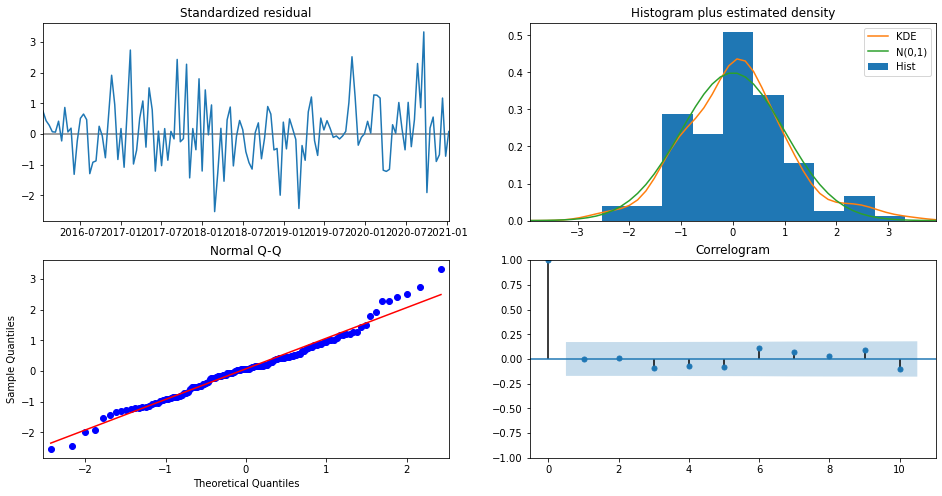

In [92]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

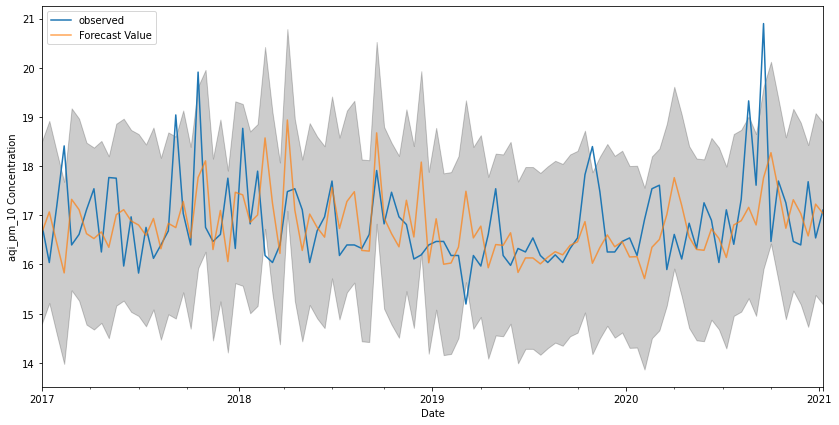

In [93]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = aqi_pm_10['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast Value', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('aqi_pm_10 Concentration')
plt.legend()
plt.show()

In [94]:
y_forecasted = pred.predicted_mean
y_truth = aqi_pm_10['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 0.98
The Root Mean Squared Error of our forecasts is 0.99


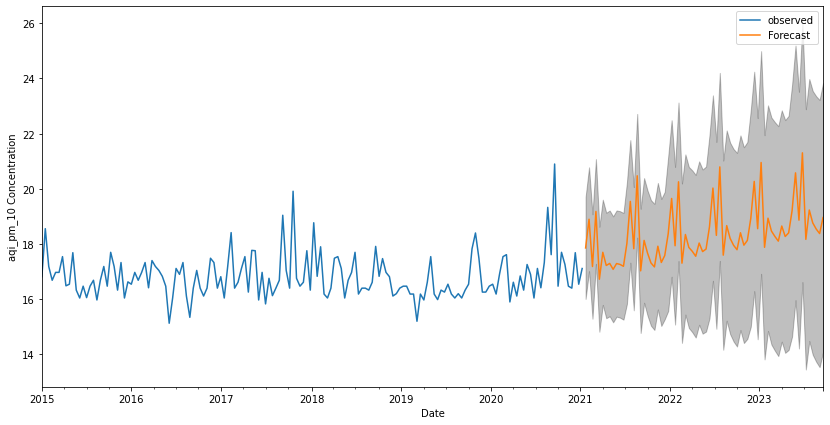

In [95]:
# Forecasting for next 3 Years
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()
ax = aqi_pm_10.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('aqi_pm_10 Concentration')
plt.legend()
plt.show()

### Considering AQI_Max

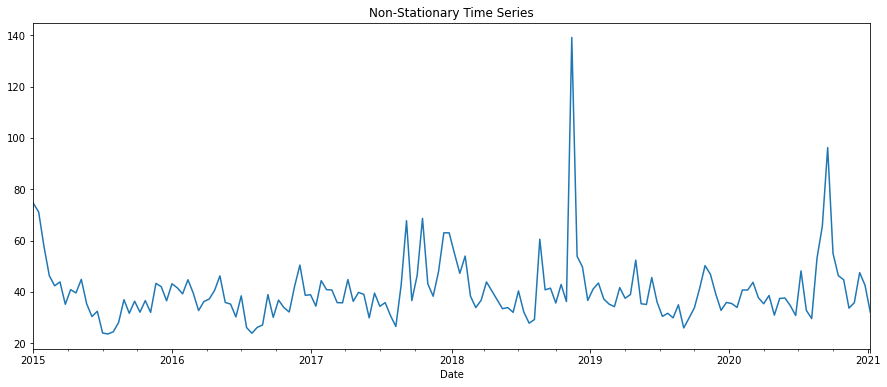

In [96]:
# Verifying & Vizualizing each pollutant's trend on a bi-weekly basis
AQI_Max = df['AQI_Max'].resample('2W').mean()
AQI_Max.plot(figsize=(15, 6))
plt.title('Non-Stationary Time Series')
plt.show()

### Time Series Decomposition

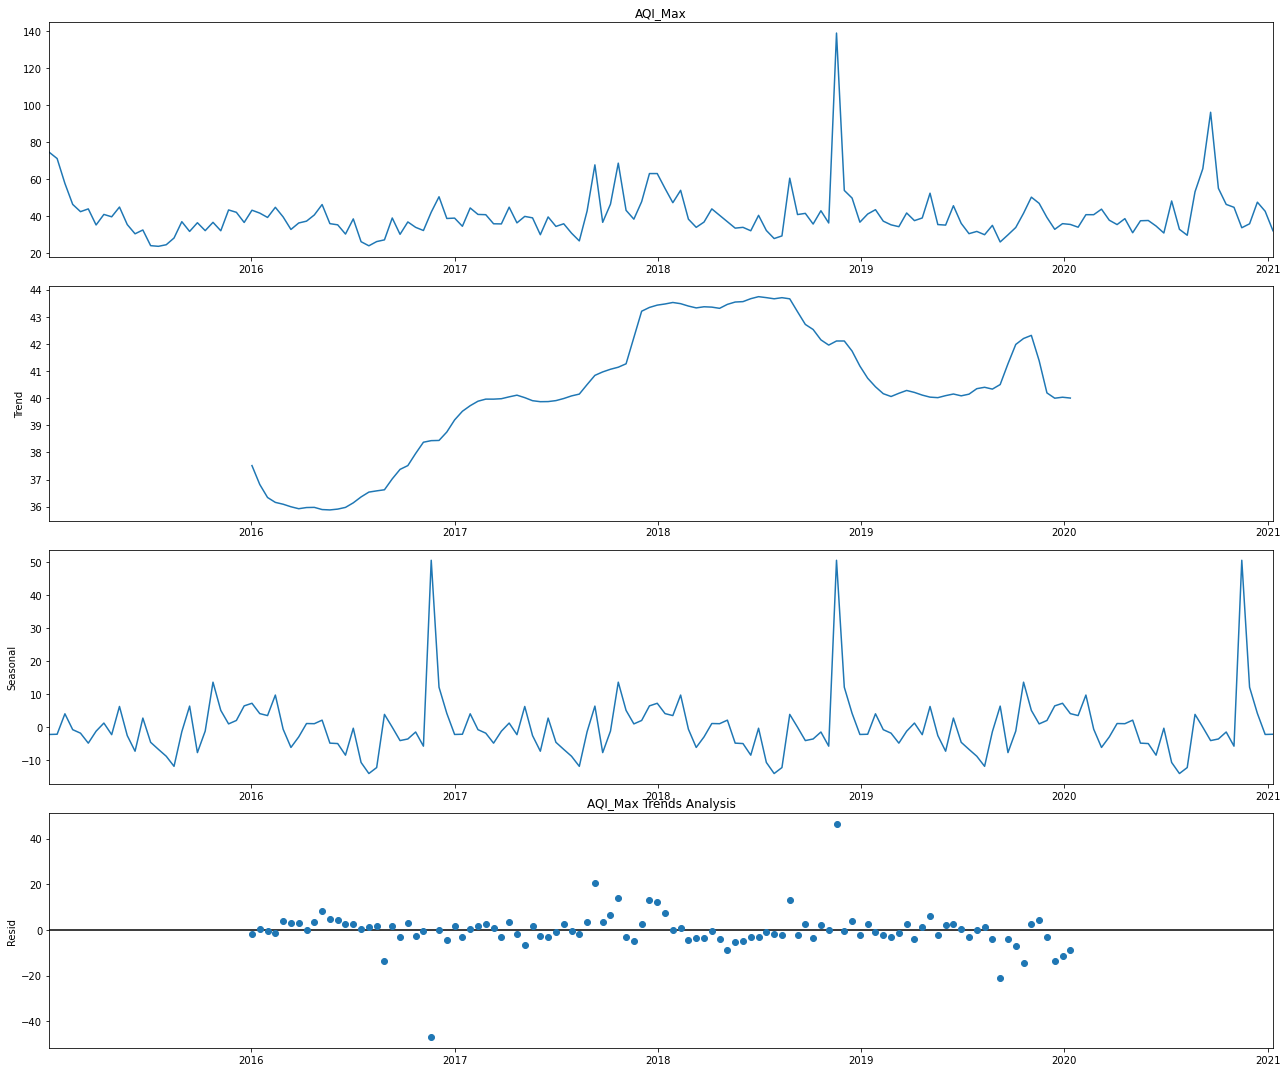

In [97]:

rcParams['figure.figsize'] = 18, 15
decomposition_max = sm.tsa.seasonal_decompose(AQI_Max, model='additive')
fig_max = decomposition_max.plot()
plt.title('AQI_Max Trends Analysis')
plt.show()

In [98]:
# SAMIRA Model for AQI_Max
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [99]:

# Model Fit iterating through to find seasonality for AQI_Max
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(AQI_Max,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1622.1327803750269
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1415.98396489787
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1245.982155779454
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1256.1829030287643
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1074.5912986104497
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:989.690647542655
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1303.4994446142337
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1080.6828738752117
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:925.5752273515322
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1264.634589773124
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1180.8655232163742
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1084.6508384560118
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1102.8904474917706
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1077.679328402416
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:980.1990471228914
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:1097.8658134151237
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1036.0693928320452
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:930.9771324015448
AR

ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1051.4270788326032
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:957.9246019637465
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:1093.9504756321398
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:1015.7625393807994
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:903.3882404399458
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:1061.8909740193662
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:1063.7418494090575
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:1042.3564497430707
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:1004.8753382900537
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:986.2812879539086
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:959.9245034612793
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:981.5673965945798
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:941.7770995786698


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:905.4678436212737
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:1426.8256095005513
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1327.156493709425
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:1228.0007599985756
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:1403.9722136916826
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:1233.8343325805163
ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:1133.3936444315
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:1428.8987974936424
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:1212.1941157574372
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:1061.277852429263
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:1335.3378402520734
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1328.9411223484537
ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:1229.8504024581562
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:1282.9451438394071
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:1235.8330908843702
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:1133.737557538616
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:1263.1860812770062
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:1197.9697131123862

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:1048.299415376533
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:1102.1584054530629
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:1056.5436952412947
ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:959.842752808494
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:1098.9658995499913
ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:1018.1730446161342


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:908.7596221984962
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:1068.979490838384
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:1070.839798916471


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:1048.3867711208857
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:1008.1894253757027
ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:987.8488094761245


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:961.767816632354
ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:983.585461832863


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:941.5389113142513


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:909.8434680624416
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1279.893955019553
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1192.7741877013364
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:1105.7353317689845
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1227.558617945379
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1061.661871953472
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:979.6489421855904
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:1275.0103448625628
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:1064.8452994044703
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:917.888342587429
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1192.4077659597494
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1158.694686225611
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:1072.9471393914628
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1090.1186028651491
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1063.657536842626
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:975.4242877375527
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:1086.4807057970172
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:1032.649324726576
ARI

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:909.2626704023534
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1253.7058398656482
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1166.4209634784609
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:1081.3139906991269
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1249.61300360789
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1086.9618217024345
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:999.0133054749069
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:1292.4075353808012
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:1083.562654809109
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:937.9926378190266
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1166.4018068858645
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1168.4009451753655
ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:1083.2598597527722
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1120.1619380665575
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1088.910799768289
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:999.2455829191554
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:1117.1595563463247
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:1059.1779600872806


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:1049.4633554315042
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:959.0663619563923
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:1086.6018192272445
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:1016.8821103039428
ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:905.1814340940381
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:1055.1299133504115
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:1057.0680448909193
ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:1043.1310086925
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:995.5003980901482
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:979.314259129626
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:961.0663320794921
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:972.7193205323015
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:935.3196807332013


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:906.7995055886252
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:1350.072360464829
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1257.15223771117
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:1164.2307872514239
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:1335.80176017705
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:1169.0047562607238
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:1074.2722419903573
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:1367.5310238962977
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:1155.3162283783327
ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:1008.4028766785804
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:1257.0724073971614
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1259.0667810799064
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:1166.1397749281255
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:1208.0194813663838
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:1171.003767225016
ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:1075.1045952258742
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:1196.1132345661033
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:1138.169137509669


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:933.2291528813498
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:1213.6740650473832
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:1133.4826765807752


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:1043.5160767052394
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:1217.904807659078
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:1053.9487510940894
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:965.4047542814221
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:1257.3588203621557


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:1053.194778680558
ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:900.8697870106649
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:1142.0195846811464
ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:1135.0890667732288
ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:1045.1939468486976


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:1093.928040205662


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:1055.5839594640943
ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:958.438362912779
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:1122.2741781630175
ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:1019.1709826698918


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:910.3240868560478
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:1062.1250621569723
ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:1063.5181686849946
ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:1047.9408272957976
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:998.9838196707507


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:997.8999492666529


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:980.2036509512222
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:975.1512341911209


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:947.1750793519932


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:959.6669454023237
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:1252.304799419313
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:1173.6905012026314
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:1088.2365198476027
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:1217.1305029362995
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:1064.034189131724
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:980.0103480586711
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:1265.4049490314565
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:1065.8810329327566
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:919.6873612405071
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:1166.372593193717
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:1148.9906161223757
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:1073.4181212592457
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:1083.6063068271778
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:1058.5026268683994
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:977.3385308639873
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:1078.9386508412804
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:1025.4130582746757

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:916.5087972733033


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:1226.9796854743915
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:1144.5438167308512
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:1057.369819118846
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:1218.4932392509545
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:1058.053930587153
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:973.2821721502397
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:1266.763254284123
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:1059.4263211047212
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:912.5236131994336


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:1142.7326669961164
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:1150.5590379325429
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:1066.718868316253
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:1084.8796214109132
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:1063.22620577259
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:971.3829885683613
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:1080.4509590859293
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:1026.4224578143703
ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:915.0088881191444
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:1057.120451852767
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:1064.591994584096
ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:1061.0410545217078
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:991.9555052267497
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:974.3337319402364


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:973.1412761948795
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:969.3535468771043
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:929.2507583548362
ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:916.4703975672804
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:1222.3075231424805


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:1135.7155382463357


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:1051.817751451797
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:1212.713706289143
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:1053.212985097036
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:968.0831771241503
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:1259.3917899240364
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:1051.7304003888846
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:907.1908172523073
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:1144.6406690001575
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:1145.5605279068816
ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:1061.6991356666401
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:1086.8308313007346
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:1057.2190988649272


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:965.0613217595354
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:1082.3491849458183
ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:1020.3817227526821


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:909.1801713288799


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:1058.427302485509


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:1062.0675879202154


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:1056.214033358333
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:993.9554388787692


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:976.3317374606053


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:967.8273973120614
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:971.3247017858408
ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:931.3445673199826


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:911.2233401192166
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:1240.9085697403607
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1161.2532637739484
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:1075.9454254837888
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:1238.1523665911952
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:1082.4859494919879
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:994.2852600909698
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:1281.684314421389
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:1080.2291363307177
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:932.0325006965817
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:1154.1598680416928
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1156.156670553723
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:1077.8955483107743
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:1103.373054902689
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:1076.4912369224508
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:994.2855641334099
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:1099.590354930459
ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:1042.305787111187
A

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:968.2381112072942
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:965.488817060735
ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:927.0513087963025


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:912.7948188250945
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:1209.1449973964627
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1126.7163423219627
ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:1042.4526134232933
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:1210.1490772438162
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:1049.3188904610763
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:965.1380259109386
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:1258.2419727451895
ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:1051.6545619850976
ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:903.1096744155079
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:1134.2953103822333
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:1128.3648367531302
ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:1044.3912172775094
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:1083.484911305272
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:1051.3170961869337
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:960.5393330682181
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:1080.2755100280413
ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:1019.45273708947

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:963.1496707842382
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:968.1462860125935
ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:928.8224228664836


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:906.8093184104034
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:1315.554605096117
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1232.8495435173013
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:1141.4159799787099
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:1306.6610418390542
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:1145.7792870743615
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:1052.1255011395567
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:1343.5371940516989
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:1138.125550161454
ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:987.7473834627089
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:1225.1611383387476
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1227.0854899876615
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:1143.3098156387239
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:1171.0980963034494
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:1139.5447969224738
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:1053.00850541681
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:1161.8433387467003
ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:1103.316317943444

/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:927.2637423931629
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:1216.0958334754173
ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:1129.8864544966484
ARIMA(2, 2, 2)x(0, 0, 2, 12)12 - AIC:1048.4135797495896
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:1217.818760116878
ARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:1052.2635475309748
ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:966.5180199699505


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:1257.4571971554083
ARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC:1051.3332528291592
ARIMA(2, 2, 2)x(0, 2, 2, 12)12 - AIC:902.6780493368174
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:1136.5320540781388
ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:1131.94613523214
ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:1050.3841461208517
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:1086.964737421957


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:1060.8195160543723


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:960.5793980026903


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:1081.5494671577765


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:1021.207142516946


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:949.2715859399342
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:1055.6947201133598
ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:1053.8909482155805


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:1051.4602982061963
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:997.2172622402453


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:977.6859230800325


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:965.4331958262895


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:967.177589000449


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:929.1630483227101


/Users/a56k/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:960.2465573246095


In [100]:
mod = sm.tsa.statespace.SARIMAX(AQI_Max,
                                order=(2, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2107      0.085      2.487      0.013       0.045       0.377
ar.L2          0.0800      0.133      0.603      0.547      -0.180       0.340
ma.L1         -1.0000    106.925     -0.009      0.993    -210.570     208.570
ar.S.L12      -0.5467      0.040    -13.737      0.000      -0.625      -0.469
sigma2       204.6780   2.19e+04      0.009      0.993   -4.27e+04    4.31e+04


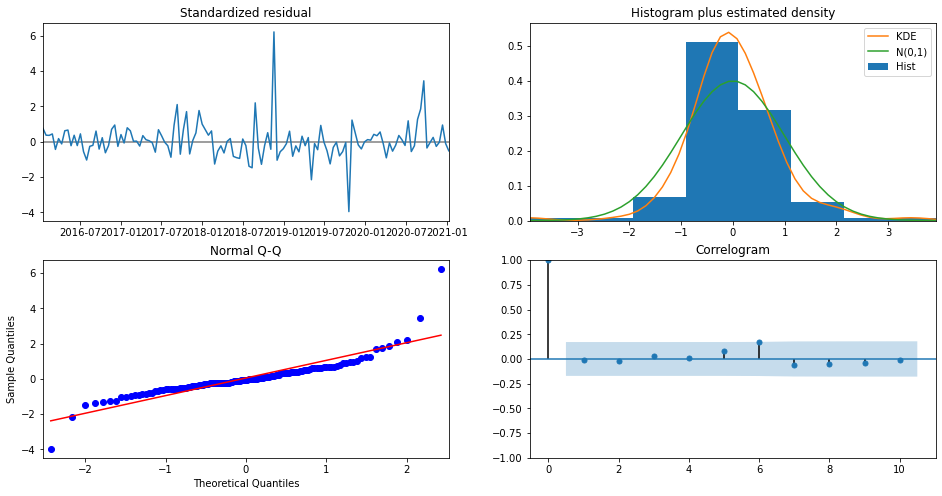

In [101]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

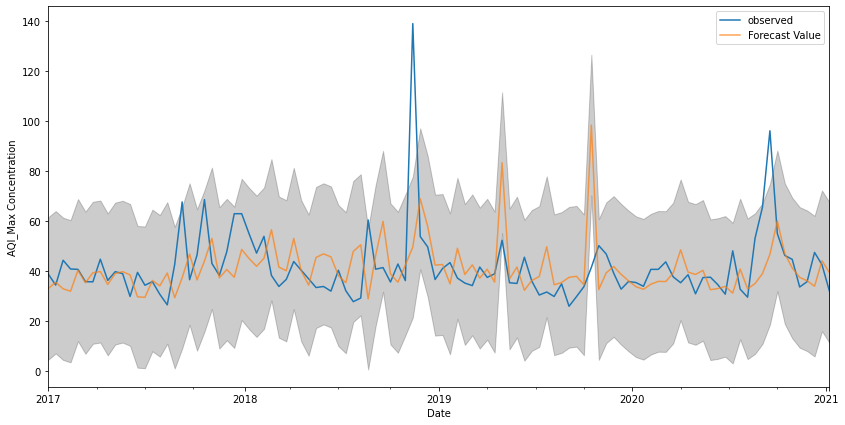

In [102]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = AQI_Max['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast Value', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI_Max Concentration')
plt.legend()
plt.show()

In [103]:
y_forecasted = pred.predicted_mean
y_truth = AQI_Max['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 243.49
The Root Mean Squared Error of our forecasts is 15.6


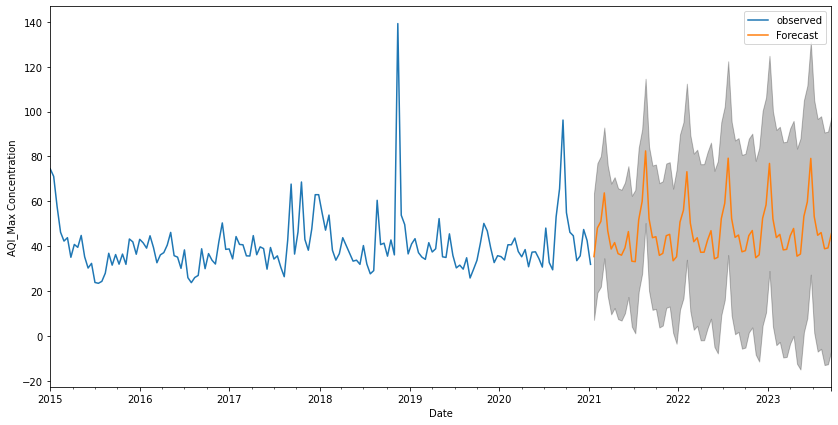

In [104]:
# Forecasting for next 3 Years
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()
ax = AQI_Max.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AQI_Max Concentration')
plt.legend()
plt.show()

In [ ]:
#df.plot(kind="line", x="Date", y =[])

### AQI_Max Level Before 2020

In [28]:
pip install bar_chart_race

     |████████████████████████████████| 156 kB 3.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
import bar_chart_race as bcr

In [34]:
#Create A Data Frame for to Vizualize Pollutants for 2020
AQI_Max2020 = df[df.index > '2019-12-31']


In [36]:
AQI_Max2020.head()

index  aqi_co  aqi_no2  aqi_o3  aqi_pm_2_5  aqi_pm_10  AQI_Max
Date                                                                      
2020-01-01   1826     7.0     22.0    27.0        37.0  16.812155     37.0
2020-01-02   1827     8.0     33.0    14.0        38.0  16.812155     38.0
2020-01-03   1828     7.0     34.0    21.0        60.0  16.812155     60.0
2020-01-04   1829     6.0     23.0    28.0        29.0  13.000000     29.0
2020-01-05   1830     5.0     22.0    32.0        21.0  16.812155     32.0

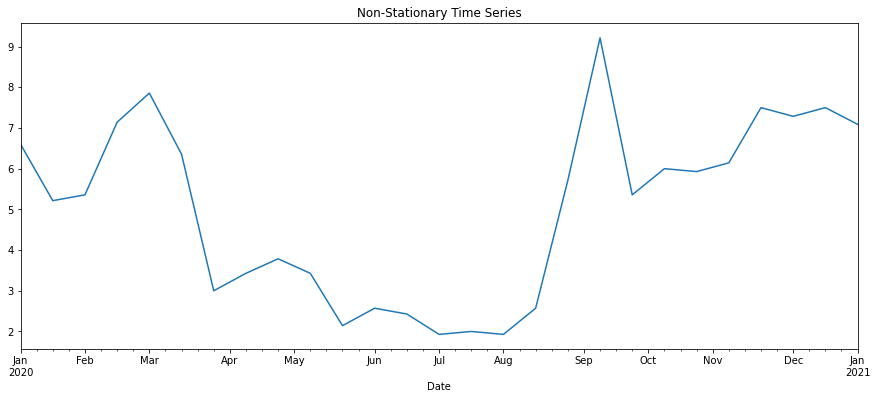

In [38]:
# Verifying & Vizualizing AQI_Max_2020 trends for each pollutants
aqi_co2020= AQI_Max2020['aqi_co'].resample('2W').mean()
aqi_co2020.plot(figsize=(15, 6))
plt.title('Non-Stationary Time Series')
plt.show()

In [39]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [46]:
AQI_Max2020 = AQI_Max2020.reset_index()

AQI_Max2020 = AQI_Max2020.set_index('Date')
AQI_Max2020.index
AQI_Max2020.head()


index  aqi_co  aqi_no2  aqi_o3  aqi_pm_2_5  aqi_pm_10  AQI_Max
Date                                                                      
2020-01-01   1826     7.0     22.0    27.0        37.0  16.812155     37.0
2020-01-02   1827     8.0     33.0    14.0        38.0  16.812155     38.0
2020-01-03   1828     7.0     34.0    21.0        60.0  16.812155     60.0
2020-01-04   1829     6.0     23.0    28.0        29.0  13.000000     29.0
2020-01-05   1830     5.0     22.0    32.0        21.0  16.812155     32.0

In [47]:
#AQI_Max2020 = AQI_Max2020(index='Date')

In [105]:
# Vizualizing all Pollutants for 2020

fig_2020 = make_subplots(
    rows=6, cols=1,
    #specs=[[{}, {}],
          # [{"colspan": 6}, None]],
    subplot_titles=("aqi_co","aqi_no2","aqi_o3","aqi_pm_2_5",'aqi_pm_10','AQI_Max'))

fig_2020.add_trace(go.Bar(x=AQI_Max2020.index, y=AQI_Max2020['aqi_co'],
                    marker=dict(color=AQI_Max2020['aqi_co'],coloraxis="coloraxis")),
              1, 1)
fig_2020.add_trace(go.Bar(x=AQI_Max2020.index, y=AQI_Max2020['aqi_no2'],
                    marker=dict(color=AQI_Max2020['aqi_no2'], coloraxis="coloraxis")),
              2, 1)
fig_2020.add_trace(go.Bar(x=AQI_Max2020.index, y=AQI_Max2020['aqi_o3'],
                    marker=dict(color=AQI_Max2020['aqi_o3'], coloraxis="coloraxis")),
              3, 1)
fig_2020.add_trace(go.Bar(x=AQI_Max2020.index, y=AQI_Max2020['aqi_pm_2_5'],
                    marker=dict(color=AQI_Max2020['aqi_pm_2_5'], coloraxis="coloraxis")),
              4, 1)
fig_2020.add_trace(go.Bar(x=AQI_Max2020.index, y=AQI_Max2020['aqi_pm_10'],
                    marker=dict(color=AQI_Max2020['aqi_pm_10'], coloraxis="coloraxis")),
              5, 1)
fig_2020.add_trace(go.Bar(x=AQI_Max2020.index, y=AQI_Max2020['AQI_Max'],
                    marker=dict(color=AQI_Max2020['AQI_Max'], coloraxis="coloraxis")),
              6, 1)

fig_2020.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels for 2020")

fig_2020.update_layout(plot_bgcolor='white')

fig_2020.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-01', x1= '2020-03-01'
    )
])

fig_2020.show()

### Analysis for Year 2020

#### AQI Max For 2020 and Prediction to the future

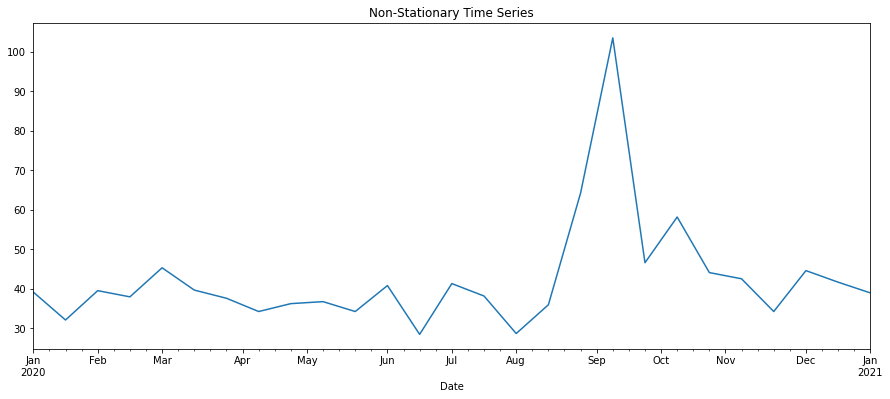

In [51]:
# Verifying & Vizualizing each pollutant's trend on a bi-weekly basis
AQI_Max20 = AQI_Max2020['AQI_Max'].resample('2W').mean()
AQI_Max20.plot(figsize=(15, 6))
plt.title('Non-Stationary Time Series')
plt.show()

### Time Series Decomposition
Not enough observation to conduct an analysis based on year 2020 alone.

In [54]:
#rcParams['figure.figsize'] = 18, 15
#decomposition_max20 = sm.tsa.seasonal_decompose(AQI_Max20, model='additive')
#fig_max20 = decomposition_max20.plot()
#plt.title('AQI_Max20 Trends Analysis')
#plt.show()

In [ ]:
# SAMIRA Model for AQI_Max20
#p = d = q = range(0, 3)
#pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#print('Examples of parameter combinations for Seasonal ARIMA...')
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))